# Анализ авторынка Казахстана за 2019 г.

### Цели и задачи:

Проанализироать авторынок Казахстана. Провести анализ компании Mercur Auto, рассчитать основные показатели, долю рынка компании, выявить основных конкурентов. Подготовить выводы и рекомендации.


### Этапы работы
#### 1. Предобработка данных:
- загрузить даные;
- привести данные к корректным типам;
- избавиться от лишних колонок в датасете;
- проверить данные на явные и неявные дубликаты;
- обработать пропуски в данных;
- изучить данные на предмет аномалий;
- добавить необходимые поля по необходимости.
#### 2. Исследовательский анализ данных:
- определить топовые марки на рынке Казахстана;
- оценить продажи на рынке Казахстана всех марок;
- проанализировать динамику продаж в целом по рынку;
- проанализировать динамику продаж по категориям (тип топлива, класс, сегмент);
- оценить продажи по регионам;
- оценить продажи по автоцентрам.
#### 3. Анализ компании Mercur Auto:
- посчитать показатели: общую прибыль, прибыль по брендам, среднюю стоимость продажи за период, среднюю стоимость в разбивке по маркам, ежемемесячную прибыль по брендам, ежемесячная среднюю стоимость продажи, ежемесячную стоимость продажи в разбивке по маркам;
- оценить емкость рынка, емкость сегментов рынка (по маркам и типам авто);
- посчитать общую долю рынка дилера, долю рынка дилера по маркам, по типам машин;
- выявить лидеров рынка и ближайших конкурентов дилера.
#### 4.Выводы и рекомендации.


### Описание данных:

- `Год` - год, в котором произведена сделка;
- `Месяц` - месяц, в котором произведена сделка;
- `Компания` - название автоцентра;
- `Бренд` - название марки авто;
- `Модель` - название модели авто;
- `Модификация` - модификация модели авто;
- `Год выпуска` - год производства авто;
- `Страна-производитель` - страна-производитель;
- `Вид топлива` - тип топлива(бензин, дизель, электричество, гибрид);
- `Объём двиг, л,` - объем двигателя в литрах;
- `Коробка передач` - тип коробки переключения передач (КПП);
- `Тип привода` - тип привода (передней, задний, полный, передний или задний);
- `Сегмент` - сегмент, к которому относится авто;
- `Регион` - регион продажи;
- `Наименование дилерского центра` - название автоцентра;
- `Тип клиента` - юр. или физ. лицо;
- `Форма расчета` - метод оплаты (наличный и безналичный);
- `Количество` - количество авто в заказе;
- `Цена, USD` - стоимость авто;
- `Продажа, USD` - итого по заказу (стоимость авто умноженная на количество и за вычетом скидок если есть);
- `Область` - регион;
- `Сегментация 2013` - сегмент автомобиля актуальный;
- `Класс 2013` - класс автомобиля актуальный;
- `Сегментация Eng` - сегмент автомобиля (англ. версия);
- `Локализация производства` - где произведено авто.

### 1. Предобработка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import re
import numpy as np
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузим данные
df = pd.read_csv('kz_2019_final_all_dirt.csv', index_col=0)

In [3]:
#посмотрим на данные
df.head()

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,...,Физ. Лицо,безналичный,1.0,31250.000000,31250.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,30581.000000,30581.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Июнь,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,35087.719000,35087.719000,г.Алматы,Легковые автомобили,C класс,C,Импорт
3,2019,Июль,Mercur Auto,Audi,A3,TFSI,2017,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,26608.232900,26608.232900,г.Алматы,Легковые автомобили,C класс,C,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,A4 Allroad TFSI,2017,Германия,Бензин,2,...,Юр. Лицо,безналичный,1.0,48343.982648,48343.982648,г.Алматы,Легковые автомобили,D класс,D,Импорт


In [4]:
# старый список колонок датасета
old_cols = df.columns.tolist()

# делаем список из новых колонок
new_cols = ['year', 'month', 'company', 'brand', 'model', 'modification',
       'release_year', 'country_of_origin', 'fuel_type', 'engine_volume_l',
       'transmission', 'drive_type', 'segment', 'region',
       'dealership_title', 'consumer_type', 'payment_method',
       'quantity', 'price_usd', 'sold_price_usd', 'location',
       'segment_2013', 'grade_2013', 'segment_eng',
       'place_of_production']

# создаем словарь через выражение
cols_change_dict = {k: v for k, v in zip(old_cols, new_cols)}
    
# меняем название
df = df.rename(columns=cols_change_dict)

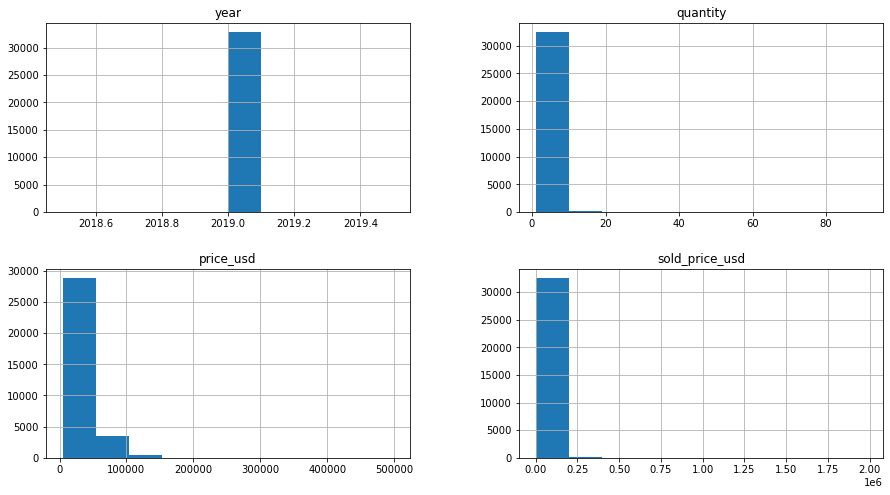

In [5]:
#Построим общую гистограмму для всех столбцов таблицы
df.hist(figsize=(15, 8));

In [6]:
# посмотрим на пропуски и дубликаты
df.info()
'Количество дубликатов: {} шт.'.format(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 32854 non-null  int64  
 1   month                32854 non-null  object 
 2   company              32854 non-null  object 
 3   brand                32854 non-null  object 
 4   model                32854 non-null  object 
 5   modification         29729 non-null  object 
 6   release_year         32700 non-null  object 
 7   country_of_origin    32854 non-null  object 
 8   fuel_type            31942 non-null  object 
 9   engine_volume_l      30968 non-null  object 
 10  transmission         31662 non-null  object 
 11  drive_type           30589 non-null  object 
 12  segment              28066 non-null  object 
 13  region               32854 non-null  object 
 14  dealership_title     32854 non-null  object 
 15  consumer_type        27124 non-null 

'Количество дубликатов: 13356 шт.'

In [7]:
# посмотрим на пропуски
round(df.isna().sum() / df.shape[0] * 100, 2)

year                    0.00
month                   0.00
company                 0.00
brand                   0.00
model                   0.00
modification            9.51
release_year            0.47
country_of_origin       0.00
fuel_type               2.78
engine_volume_l         5.74
transmission            3.63
drive_type              6.89
segment                14.57
region                  0.00
dealership_title        0.00
consumer_type          17.44
payment_method         78.45
quantity                0.02
price_usd               0.00
sold_price_usd          0.00
location                0.00
segment_2013            0.00
grade_2013              0.00
segment_eng             0.00
place_of_production     0.00
dtype: float64

Количество дубликатов составило 13 357 шт. В нашем случае, это не дубликаты, а повторяющиеся сделки по продаже авто, поэтому данные удалять не будем. 


Избавимся от столбцов: `'modification', 'segment', 'dealership_title', 'consumer_type', 'payment_method', 'segment_eng', 'place_of_production'`. Данные неполные и носят коссвенный характер при анализе. 


Пропуски в столбца `'release_year', 'fuel_type', 'engine_volume_l', 'transmission', 'drive_type', 'quantity'` составляют от 0.5 - 6.9 %. Удалим пропуски. 

In [8]:
# избавимся от столбцов, которые ненужны для анализа
(df
 .drop([
     'modification', 'segment', 'dealership_title', 'consumer_type', 'payment_method', 'segment_eng', 'place_of_production'
 ], axis=1, inplace=True))

In [9]:
# удалим пропуски
cols_to_drop = ['release_year', 'fuel_type', 'engine_volume_l', 'transmission', 'drive_type', 'quantity']
df = df.dropna(subset=cols_to_drop)

#### Колонка `'year'` и `'month'`

In [10]:
df['year'].unique(), df['month'].unique()

(array([2019], dtype=int64),
 array(['Май', 'Июнь', 'Июль', 'Январь', 'Февраль', 'Март', 'Апрель',
        'Август', 'Сентябрь'], dtype=object))

In [11]:
# объединим год и месяц
date_list = {'Январь': '31-01-2019', 'Февраль': '28-02-2019', 'Март': '31-03-2019', 'Апрель': '30-04-2019',
             'Май': '31-05-2019', 'Июнь': '30-06-2019', 'Июль': '31-07-2019', 'Август': '31-08-2019', 
             'Сентябрь': '30-09-2019', 'Октябрь': '31-10-2019', 'Ноябрь': '30-11-2019', 'Декабрь': '31-12-2019'}

df['date'] = df['month'].map(date_list)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y').dt.date

# удалим столбцы год и месяц
df.drop(['year', 'month'], axis=1, inplace=True)

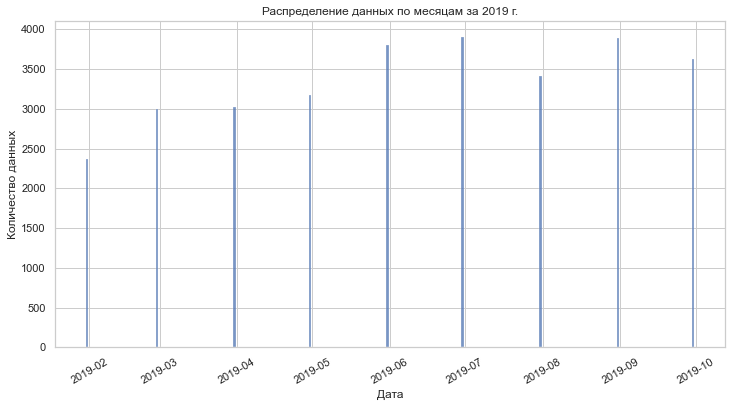

In [12]:
# посмотрим на распределение данных по месяцам
# зададим размер графика
plt.figure(figsize = (12, 6))
# установим цветовую палитру
sns.set_theme(style="whitegrid")

ax = sns.histplot(data = df, x = 'date') # построим гистограмму 

plt.xlabel('Дата') # название оси Х
plt.ylabel('Количество данных') # название оси У
plt.title('Распределение данных по месяцам за 2019 г.') # название гистограммы
plt.xticks(rotation = 30)  # поворот записей по оси Х
plt.show()

Данные представлены за 2019 год с марта - сентябрь (вкл.). Распределены достаточно равномерно. С январе - апрель данных меньше, возможен сезонный характер. 

#### Колонка `'company'`

In [13]:
df['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Sivi Finance Consulting', 'Eurasia Motor Premium',
       'Daewoo Bus Kazakhstan', 'Caspian Motors', 'Каспиан Моторс',
       'ТК Рос-Авто', 'Astana Motors', 'Hyundai Com Trans Kazakhstan ',
       'Nissan Manufacturing RUS', 'СВС', 'Allur Auto',
       'Jaguar Land Rover', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'Autokapital', 'MMC RUS', 'ММС Рус', 'УзАвто-Казахстан',
       'Renault Россия', 'Алматы АТО', 'Scania Central Asia',
       'Subaru Kazakhstan', 'SMC', 'Scandinavian Motors',
       'Хино Моторс Казахстан', 'Hino Motors Kazakhstan'], dtype=object)

In [14]:
# избавимся от неявных дубликатов в названиях компаний
df['company'] = (df['company']
                 .replace('Хино Моторс Казахстан', 'Hino Motors Kazakhstan')
                 .replace('ММС Рус', 'MMC RUS')
                 .replace('Каспиан Моторс', 'Caspian Motors')
                )
df['company'].nunique()

27

Найдены неявные дубликаты. Названия написаны где-то на кириллице, где-то на латинице. Подобные названия приведены в одному шаблону. Общее количество компаний - 27 дилеров.

#### Колонки `'brand', 'model'`

In [15]:
df['brand'].nunique(), df['model'].nunique()

(41, 219)

Количество представленных брендов - 41 шт., моделей - 219 шт.

#### Колонка `'release_year'`

In [16]:
# посмотрим на год выпуска
df['release_year'].unique()

array(['2018', '2017', '2016', '2011', '2015', '2014', '2013', '2\xa0018',
       '2\xa0017', '2\xa0016', 2018, 2017, 2016], dtype=object)

In [17]:
# избавимся от аномалий в данных
def change_year(row):
    if row == '2\xa0018':
        return '2018'
    elif row == '2\xa0017':
        return '2017'
    elif row == '2\xa0016':
        return '2016'
    else:
        return row
    
df['release_year'] = df['release_year'].apply(change_year).astype('int64')
df['release_year'].unique()

array([2018, 2017, 2016, 2011, 2015, 2014, 2013], dtype=int64)

Данные содержали аномалии в значениях года выпуска. Значения исправлены, изменен тип данных на 'int'. Года выпуска: с 2011, 2013 - 2018 (вкл.). 

#### Колонка `'country_of_origin'`

In [18]:
df['country_of_origin'].unique()

array(['Германия', 'США', 'Республика Казахстан', 'Российская Федерация',
       'Белоруссия', 'Турция', 'Япония', 'Корея', 'Вьетнам', 'UK',
       'Таиланд', 'Узбекистан', 'Австрия', 'Нидерланды', 'Венгрия',
       'Швеция'], dtype=object)

In [19]:
# напишем функцию, чтоб закодировать наименования стран по-новому
def country_code(row):
    if row == 'Германия':
        return 'DEU'
    elif row == 'США':
        return 'USA'
    elif row == 'Республика Казахстан':
        return 'KAZ'
    elif row == 'Российская Федерация':
        return 'RUS'
    elif row == 'Белоруссия':
        return 'BLR'
    elif row == 'Турция':
        return 'TUR'
    elif row == 'Япония':
        return 'JPN'
    elif row == 'Корея':
        return 'KOR'
    elif row == 'Вьетнам':
        return 'VNM'
    elif row == 'UK':
        return 'GBR'
    elif row == 'Таиланд':
        return 'THA'
    elif row == 'Узбекистан':
        return 'UZB'
    elif row == 'Венгрия':
        return 'HUN'
    elif row == 'Австрия':
        return 'AUT'
    elif row == 'Нидерланды':
        return 'NLD'
    elif row == 'Швеция':
        return 'SWE'
    else:
        return row
    
# применим функцию и посморим, что получилось
df['country_of_origin'] = df['country_of_origin'].apply(country_code)
df['country_of_origin'].unique()

array(['DEU', 'USA', 'KAZ', 'RUS', 'BLR', 'TUR', 'JPN', 'KOR', 'VNM',
       'GBR', 'THA', 'UZB', 'AUT', 'NLD', 'HUN', 'SWE'], dtype=object)

Автомобили были произведены в следующих странах: Германия, США, Республика Казахстан, Российская Федерация, Белоруссия, Турция, Япония, Корея, Вьетнам, UK, Таиланд, Узбекистан, Венгрия, Австрия, Нидерланды, Швеция. Назания стран были приведены к следующим значениям:
- DEU - Германия;
- USA - США;
- KAZ - Республика Казахстан;
- RUS - Российская Федерация;
- BLR - Белоруссия;
- TUR - Турция;
- JPN - Япония;
- KOR - Корея;
- VNM - Вьетнам;
- GBR - UK; 
- THA - Таиланд;
- UZB - Узбекистан;
- HUN - Венгрия;
- AUT - Австрия;
- NLD - Нидерланды;
- SWE - Швеция.

#### Колонка `'fuel_type'`

In [20]:
df['fuel_type'].unique()

array(['Бензин', 'Дизель', 'гибрид', 'Электрический', 'дизель ',
       'Газовый'], dtype=object)

In [21]:
# закодируем типы топлива
def fuel_code(row):
    if row == 'Бензин':
        return 'F'
    elif row == 'Дизель' or row == 'дизель ':
        return 'D'
    elif row == 'Электрический':
        return 'E'
    elif row == 'гибрид':
        return 'HYB'
    elif row == 'Газовый':
        return 'G'

# применим функцию и посморим, что получилось
df['fuel_type'] = df['fuel_type'].apply(fuel_code)
df['fuel_type'].value_counts()

F      29535
D        590
G         70
HYB       18
E          1
Name: fuel_type, dtype: int64

Типы топлива были закодированы следующим образом:
- F - Бензин;
- D - Дизель;
- E - Электрическийм;
- G - Газовый;
- HYB - Гибрид.

#### Колонка `'engine_volume_l'`

In [22]:
df['engine_volume_l'].isna().sum()

0

In [23]:
df['engine_volume_l'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', '0', '1.8', '1.596', '1596',
       '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '10.3', '8.7', '1600', '1.998', '1.598', '1.248', '2.359', '2359',
       '1999', '3.8', '3800', '1.591', '1.368', '3.342', '3.47', '3470',
       '2000', '1.999', '1.69', '1690', '1.774', '1598', '1774', '4.6',
       '3,5', '5.7', '10.5', '4', '12', '1.2', '3.6', '6.5', '5.5', '4.5',
       '1.25', '1.3', '0.002', '0.0016', '1998', '13', '16', '1400',
       '2.3', '1.33', '2,4G', '2.693', '2693', '2.235', '2235', '2.0',
       '14860', '14.8', '6.7', '1,2T', '4.88', 4.88, 4.0, 2.0, 6.6, 2.8,
       3.6], dtype=object)

In [24]:
# напишем функцию, чтоб почистить данные от символов и запятых
def gh(row):
    new_row = re.findall(r'[0-9]+\.?\,?\d*', str(row), flags=0)[0].replace(',', '.')
    return new_row


df['engine_volume_l'] = df['engine_volume_l'].apply(gh)

# преобразим данные в действитеьные числа
df['engine_volume_l'] = df['engine_volume_l'].astype('float')

# удалим значение 0
df = df.loc[df['engine_volume_l'] != 0.0]

In [25]:
df['engine_volume_l'].isna().sum()

0

In [26]:
# напишем функцию, чтобы задать корректную размерность
def volume_cor(row):
    if row < 1:
        return round(row * 1000)
    elif row == 16:
        return round(row / 10, 1)
    elif row > 16:
        return round(row / 1000, 1)
    else:
        return round(row, 1)
    
# примменим функцию и посмотрим, что получилось
df['engine_volume_l'] = df['engine_volume_l'].apply(volume_cor).astype('float')
df['engine_volume_l'].unique()

array([ 1.4,  2. ,  3. ,  1.5,  4.4,  6.6,  1.8,  1.6,  2.4,  1.7,  6.2,
        2.5,  3.5,  2.2,  2.7,  2.8,  4.2,  5. ,  3.9,  7.5, 11. , 12.3,
        3.7,  5.6, 10.3,  8.7,  1.2,  3.8,  3.3,  4.6,  5.7, 10.5,  4. ,
       12. ,  3.6,  6.5,  5.5,  4.5,  1.3, 13. ,  2.3, 14.9, 14.8,  6.7,
        4.9])

Из данных были убраны буквенные символы. Предположительно, были сделаны ошибки в значениях превышающих 16 ед., они были скорректированы. Удалены значения равные нулю. Изменен тип данных на 'float'.

#### Колонка `'transmission'`

In [27]:
df['transmission'].unique()

array(['S-Тronic', 'S-Тroic', 'S-troic', 'S-tronic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ',
       'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ', '7DCT',
       '7 DCT', '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ', '6 МТ',
       '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', '9AT',
       'CVT (вариатор)', 'CVT(вариATор)', 'CVТ(вариатор)', '9АТ', '12AT',
       '7AT', '7АТ', '6М/Т', '6M/T', '6M/Т', '0', 'PDK', '8АКПП',
       '8-ступ АКПП', 'АКПП8', '8', 'АКПП', ' -', '-', '7 DSG', '7DSG',
       '6 DSG', '6DSG', 'CVТ(вАриАтор)', '5MТ', 'АТ (автомат)',
       '8АТ4МoТion', '6A', '5M', '6-ступАКПП', '6А', 'AT (автомат)',
       '7DSG4МoТion', '6Aвтомат', '6Aатомат', '5М', '5-ступМТ', 'АT',
       'A/T', '7АT', 'МТ (механика)', 'Механическая'], dtype=object)

In [28]:
def transmission_type(row):
    if row in (
        'МТ (механика)', 'Механическая', 'Мех.', 'МКПП', '5МТ', 'MT', '6МТ', '6M/T', '6MT', 
        '5M', 'МТ', '5MT', '6MТ', 'MТ', '6 МТ', '5М', '6М/Т', '5-ступМТ', '6M/Т', '5 МТ', '6 MT', '5MТ'):
        return 'M'
    elif row in (
        '6Aатомат', 'AT (автомат)', '6Aвтомат', 'АТ (автомат)', 'АКПП', 'Автомат', 'АКПП8', 
        '4АТ', 'AT', '6AT', '6АТ', '8АТ', 'A', '7AT', 'АТ', '5AT', '9AT', '6A', 'A/T', '6 АТ', 
        '6 AT', '8AT', '6АT', '7АT', '8АКПП', '6-ступАКПП', '6А', 'АT', '8 АТ', '4AT',  '4 АТ', 
        '12AT', '9АТ', '8-ступ АКПП', '5АТ', '7АТ', '8АТ4МoТion', 'Tiptronic', 'ТipТronic', 
        'CVТ', 'CVT', 'CVT(вариATор)', 'CVТ(вариатор)', 'CVT (вариатор)', 'CVТ(вАриАтор)', 'CVT(вариатор)'):
        return 'A'
    elif row in ('S-tronic', 'S-Тroic', 'S-troic', '7 DSG', '6 DSG', 'S-Тronic', 'Steptronic', 'SТepТronic', 
                 '6DSG', '7DSG', '7DSG4МoТion', 'PowershifТS6', 'PowershiftS6', 'Powershift S6', '7DCT', '7DCТ', '7 DCT', 'PDK'):
        return 'R'
    else:
        return 'unknown'

df['transmission'] = df['transmission'].apply(transmission_type)
df['transmission'].unique()

array(['R', 'A', 'M', 'unknown'], dtype=object)

In [29]:
df['transmission'].value_counts()

A          20324
M           8813
R            579
unknown      497
Name: transmission, dtype: int64

Данные в колонке `'transmission'` закодироованы следующим образом:
- M - механическая КПП;
- A - автоматическая КПП;
- R - роботизированная КПП;
- 'unknown' - неизвестно какой тип КПП.

#### Колонка `'drive_type'`

In [30]:
df['drive_type'].unique()

array(['FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD', 'Полный',
       'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ', 'задний', '2WD',
       '2 WD', '4 WD', '4х4', '4x2', 'FR', '4х2', '4x4', '2х4', 'CVT',
       '0', ' -', '-', 'P/TIME', 'FF', 'полный', '4Motion', 'передний '],
      dtype=object)

In [31]:
# напишем функцию, чтобы закодировать данные по-новому
def drive_cat(row):
    if row in ('Передний', 'передний ', 'передний', 'FWD', 'FF'):
        return 'FWD'
    elif row in ['Задний', 'задний', 'RWD']:
        return 'RWD'
    elif row in ['Полный', 'Полный ', 'полный', '4WD', '4 WD', 'AWD', '4Motion', 'Quattro', 'quattro', '4х4', '4x4']:
        return '4WD'
    elif row in ['2WD', '2х4', '4х2', '4х2.2', '2 WD', '4x2']:
        return '2WD'
    else:
        return 'unknown'
    
# применим функцию, посмотрим, что получилось
df['drive_type'] = df['drive_type'].apply(drive_cat)
df['drive_type'].unique()

array(['FWD', '4WD', 'RWD', '2WD', 'unknown'], dtype=object)

Были закодированы типы приводов следующим образом:
- 4WD - полный привод;
- FWD - передний привод;
- RWD - задний привод;
- 2WD - неполный привод (неизвестно передний или задний);
- 'unknown' - неизвестно.

#### Колонка `'region'`

In [32]:
df['region'].unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Уральск',
       'Усть-Каменогорск', 'Петропавловск', 'Павлодар', 'Кокшетау',
       'Актау', 'Семей', 'Караганда', 'Актобе', 'Шымкент', 'Талдыкорган',
       'Кызылорда', 'Экибастуз', 'Рудный', 'Тараз', 'Аксай', 'Щучинск',
       'ЭКСПОРТ', 'Риддер'], dtype=object)

In [33]:
'В данных представлено - {} города.'.format(df['region'].nunique())

'В данных представлено - 23 города.'

#### Колонка `'quantity'`

Напишем функцию для определения 95-перцентиля, общей информации и построения боксплота.

In [34]:
# напишем функцию для boxplot визуализации
def boxplot_viz(df, dim = [], x = [], name = []):
    # зададим размер графика
    plt.figure(figsize = (12, 6))
    # установим цветовую палитру
    sns.set_theme(style="whitegrid")
    
    # построим боксплот
    boxplot_1 = sns.boxplot(data = df , x = dim)
    plt.xlabel(x) # название оси У
    plt.title(name) # название гистограммы
    return boxplot_1

In [35]:
def common_info(df, dim = []):
    per_95 = '95 перцентиль равен {}'.format(np.percentile(df[dim], 95))
    median_info = 'Медиана равна {}'.format(df[dim].median())
    return df[dim].describe(), per_95, median_info

In [36]:
df['quantity'] = df['quantity'].astype('int64')

In [37]:
df['quantity'].unique()

array([ 1,  3,  2,  4,  5,  6,  7,  8, 11,  9, 10, 20, 12, 37, 40, 17, 15,
       24, 26, 13, 19, 14, 25, 16, 22, 18, 30, 21, 31, 46, 23, 29, 41, 33,
       56, 28, 35, 36, 39, 34, 27, 38, 32, 91], dtype=int64)

In [38]:
common_info(df, 'quantity')

(count    30213.000000
 mean         1.348327
 std          2.139330
 min          1.000000
 25%          1.000000
 50%          1.000000
 75%          1.000000
 max         91.000000
 Name: quantity, dtype: float64,
 '95 перцентиль равен 2.0',
 'Медиана равна 1.0')

In [39]:
'Процент данных, где количество более 1 шт, составил - {}%'.format(round(df.loc[df['quantity'] > 1]['quantity'].count() / df.shape[0] * 100, 1))

'Процент данных, где количество более 1 шт, составил - 7.6%'

In [40]:
# добавим классификацию покупки
def order_type(row):
    if row == 1:
        return 'розница'
    else:
        return 'опт'

df['order_type'] = df['quantity'].apply(order_type)

Медиана количества проданнных авто - 1 шт. Количество более 2 считается аномальным. Скорее всего, это оптовые покупки авто юр.лицами. В связи с этим, добавлена дополнительная колонка, где покупка более одного авто, считается оптовой, только одно авто - розница.

#### Колонка `'price_usd'`

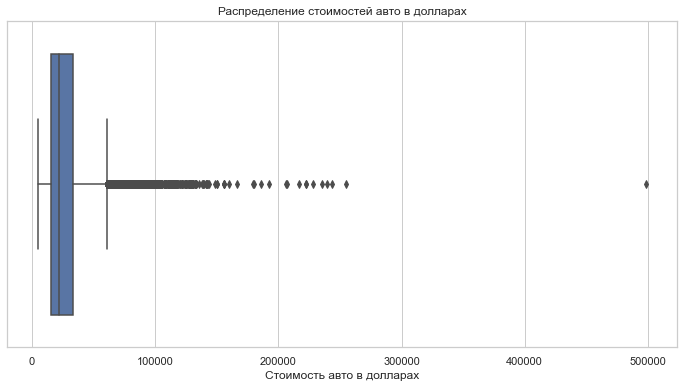

In [41]:
# построим боксплот и посморим на распределение данных
boxplot_viz(df, 'price_usd', 'Стоимость авто в долларах', 'Распределение стоимостей авто в долларах')
plt.show()

In [42]:
common_info(df, 'price_usd')

(count     30213.000000
 mean      28853.705340
 std       21571.063976
 min        4571.358913
 25%       15096.906982
 50%       22141.607746
 75%       33318.936871
 max      498787.514716
 Name: price_usd, dtype: float64,
 '95 перцентиль равен 76934.52380952382',
 'Медиана равна 22141.60774555936')

In [43]:
# посмотрим на максимальное значение
df.loc[df['price_usd'] > 300000][['brand', 'model', 'price_usd', 'sold_price_usd', 'quantity']]

,brand,model,price_usd,sold_price_usd,quantity
32832,Rolls Royce,Ghost,498787.514716,498787.514716,1


In [44]:
# посмотрим на минимальные значения
df.loc[df['price_usd'] < 7000][['brand', 'model', 'price_usd', 'sold_price_usd', 'quantity']]

,brand,model,price_usd,sold_price_usd,quantity
17102,Peugeot,301,6095.145217,6095.145217,1
32332,Jac,X200,4571.358913,4571.358913,1


Медиана стоимости авто равна 22 142 долларов, стоимость более 76 935 долларов, можно посчитать выбросами. Стоимость некоторые марок авто достаточно высокая. 

#### Колонка `'sold_price_usd'`

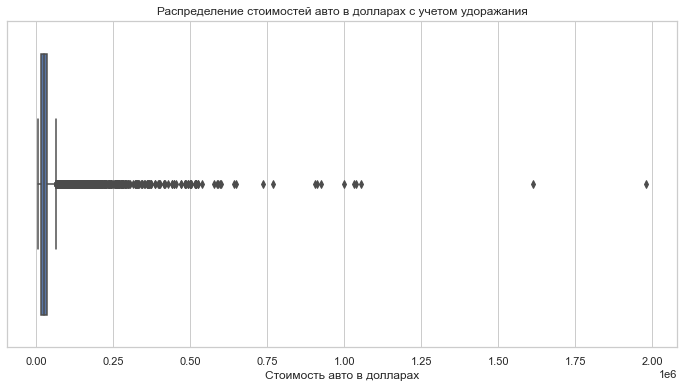

In [45]:
# построим боксплот и посморим на распределение данных
boxplot_viz(df, 'sold_price_usd', 'Стоимость авто в долларах', 'Распределение стоимостей авто в долларах с учетом удоражания')
plt.show()

In [46]:
common_info(df, 'sold_price_usd')

(count    3.021300e+04
 mean     3.395591e+04
 std      3.991703e+04
 min      4.571359e+03
 25%      1.635498e+04
 50%      2.481757e+04
 75%      3.608326e+04
 max      1.980922e+06
 Name: sold_price_usd, dtype: float64,
 '95 перцентиль равен 90000.0',
 'Медиана равна 24817.573309017167')

Судя по колонке `'sold_price_usd'` стоимость автомобилей пересчитывалась, но только в большую сторону. Медиана стоимости заказа на авто - 24 827 долларов. Стоимость заказа более 90 000 долларов, считается высокой. Данные решено не удалять, так как в данных есть предположительно оптовые заказы.   

#### Колонка `'location'`

In [47]:
df['location'].unique()

array(['г.Алматы', 'Костанайская область', 'Атырауская область',
       'г.Астана', 'Западно-Казахстанская область',
       'Восточно-Казахстанская область', 'Северо-Казахстанская область',
       'Павлодарская область', 'Акмолинская область',
       'Мангистауская область', 'Карагандинская область',
       'Актюбинская область', 'Южно-Казахстанская область',
       'Алматинская область', 'Кызылординская область',
       'Жамбылская область', 'Экспорт область'], dtype=object)

In [48]:
'В данных представлено - {} отдельных областей/регионов.'.format(df['location'].nunique())

'В данных представлено - 17 отдельных областей/регионов.'

#### Колонка `'segment_2013'`

In [49]:
df['segment_2013'].unique()

array(['Легковые автомобили ', 'Внедорожники ',
       'Коммерческие автомобили ', 'Минивэны', 'Пикапы '], dtype=object)

In [50]:
df['segment_2013'] = df['segment_2013'].str.rstrip()
df['segment_2013'].unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

Из названий были убраны пробелы, где это небходимо.

#### Колонка `'grade_2013'`

In [51]:
df['grade_2013'].unique()

array(['C класс ', 'D класс ', 'Спортивные автомобили ', 'E класс ',
       'F класс ', 'Среднеразмерные SUV ', 'Стандартные SUV ',
       'Компактные SUV ', 'B класс ', 'Субкомпактные SUV ',
       'Большие автобусы ', 'Микроавтобусы ', 'Малотоннажные грузовики ',
       'Развозные автомобили ', 'Среднетоннажные грузовики ',
       'Полноразмерный Минивэн ', 'Средние автобусы ',
       'Крупнотоннажные грузовики ', 'Полноразмерные SUV ', 'Pick-ups',
       'A класс ', 'Компактвэн'], dtype=object)

In [52]:
# напишем функцию, чтобы закодировать данные по-новому
def grade_cat(row):
    row = row.rstrip() # избавимся от пробелом в конце
    if row in ('Компактные SUV'):
        return 'С-SUV'
    elif row in ['Субкомпактные SUV']:
        return 'В-SUV'
    elif row in ['Среднеразмерные SUV']:
        return 'D-SUV'
    elif row in ['Полноразмерные SUV']:
        return 'E-SUV'
    else:
        return row
    
# применим функцию, посмотрим, что получилось
df['grade_2013'] = df['grade_2013'].apply(grade_cat)
df['grade_2013'].unique()

array(['C класс', 'D класс', 'Спортивные автомобили', 'E класс',
       'F класс', 'D-SUV', 'Стандартные SUV', 'С-SUV', 'B класс', 'В-SUV',
       'Большие автобусы', 'Микроавтобусы', 'Малотоннажные грузовики',
       'Развозные автомобили', 'Среднетоннажные грузовики',
       'Полноразмерный Минивэн', 'Средние автобусы',
       'Крупнотоннажные грузовики', 'E-SUV', 'Pick-ups', 'A класс',
       'Компактвэн'], dtype=object)

Немного поправили названия в SUV классификации. Избавились от пробелом в названиях. 
Классификация SUV:

- особо малые (А-SUV)
- субкомпактные (В-SUV)
- компактные (С-SUV)
- среднеразмерные (D-SUV)
- полноразмерные (E-SUV)

### Выводы по предобработке

В процессе обработки данных:
- название столбцов приведены к нижнему регистру и переименованы на латинице;
- найдены явные дубликаты - 13 357 шт., оставили;
- удалены столбцы: `'year'`, `'month'`, `'modification'`, `'segment'`, `'dealership_title'`, `'consumer_type'`, `'payment_method'`, `'segment_eng'`, `'place_of_production'`, т.к данные неполные и носят коссвенный характер при анализе;
- удалены пропуски в столбцах: `'release_year'`, `'fuel_type'`, `'engine_volume_l'`, `'transmission'`, `'drive_type'`, `'quantity'`;
- На основании столбца с годом и месяцем создан столбец `'date'`, где тип данных дата;
- найдены неявные дубликаты в `'company'`, данные приведены в одному шаблону;
- найдены аномалии в данные `'release_year'`, наименования данных исправлены, также тип данных изменен на целочисленный;
- данные `'country_of_origin'`, `'fuel_type'`, `'transmission'`, `drive_type'` закодированы, созданы новые словари;
- данные `'engine_volume_l'` приведены к действительным числам, убраны аномалии в данных; 
- в столбце `'quantity'` тип данных изменен на целочисленный;
- в столбцах: `'segment_2013'`, `'grade_2013'` убраны пробелы в конце строк.

Данные представлены за 2019 год, с янв - сент. (вкл.). Распределение количества данных по месяцам равномерное. Есть небольшой перекос, но он носит скорее сезонный характер. В данных представлено 27 автоцентров. Количество брендов - 41 шт., моделей - 219 шт. Год производства авто охватывает период 2011 - 2018 г. Страны- производители: Германия, США, Республика Казахстан, Российская Федерация, Белоруссия, Турция, Япония, Корея, Вьетнам, UK, Таиланд, Узбекистан, Венгрия, Австрия, Нидерланды, Швеция. Типы топлива: бензин, дизель, электрическийм, газовый, гибрид. Типы КПП: механическая, автоматическая, роботизированная, 'unknown'(неизвестно какой тип). Типы привода: полный, передний, задний привод, неполный привод (неизвестно передний или задний), 'unknown' (неизвестно какой привод). Регионы - 22 города и один пункт экспорт. Медиана количества проданнных авто - 1 шт. Количество более 2 - оптовые покупки авто. 

Медиана стоимости авто - 22 142 долларов, стоимость отдельных авто более 76 935 долларов. Медиана стоимости заказа на авто - 24 827 долларов. Стоимость заказа более 90 000 долларов - крупные оптовые заказы. В данных представлено - 17 отдельных областей/регионов.

## 2. Исследовательский анализ данных
Предварительно напишем функции для построения сводных таблиц и визуализации данных.

In [53]:
# функцию считает объем продаж и количество авто по выбранной категории
def ptb_cat(df, dim_group = [], method = []):
    new =(df
           .groupby(dim_group)
           .agg({'quantity': method, 'sold_price_usd' :method})
           .rename(columns = {'quantity': 'total', 'sold_price_usd': 'revenue_K'})
           .sort_values(by = 'revenue_K', ascending = False)
           .reset_index()
          )
        
    new['share_%'] = round(new['revenue_K'] / df['sold_price_usd'].sum() * 100, 1).astype('int64')
    new['revenue_K'] = round(new['revenue_K'] / 1000).astype('int64')
    new['total'] = new['total'].astype('int64')
    return new

In [54]:
# функция для визуализации: два барплота
def bar_viz(
    n, data1, data2, dim1 = [], dim1_2 = [], dim2 = [], dim2_2 = [], 
    x1_name = [], y1_name = [], title_name1 = [], x2_name = [], y2_name = [], title_name2 = []):
    # установим цветовую палитру
    sns.set_theme(style="whitegrid")
    my_pal = sns.color_palette('light:#00425A', n)
    
    ax1 = plt.subplot(1, 2, 1)
    f = sns.barplot(data = data1 , x = dim1, y = dim1_2, palette=my_pal, ax = ax1) # построим гистограмму 
    f.set_title(title_name1)
    f.set_xlabel(x1_name)
    f.set_ylabel(y1_name)
    plt.xticks(rotation = 90)  # поворот записей по оси Х
    
     # добавим записиан для каждого столбца в диаграмме
    for p in f.patches:
     # высота столбца
     height = p.get_height()
     # добавим текс на каждый столбец
     f.text(x = p.get_x()+(p.get_width()/2), # положение записей на столбцах по оси X по центру
     y = height, # положение записей на столбцах по оси Y 
     s = '{:.0f}'.format(height), # формат записей на столбцах
     ha = 'center') # положение записей на столбцах
        
    # размер графика
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    f2 = sns.barplot(data = data2 , x = dim2, y = dim2_2, palette=my_pal, ax = ax2) # построим гистограмму 
    f2.set_title(title_name2)
    f2.set_xlabel(x2_name)
    f2.set_ylabel(y2_name)
    plt.xticks(rotation = 90)  # поворот записей по оси Х
    
     # добавим записиан для каждого столбца в диаграмме
    for p in f2.patches:
     # высота столбца
     height = p.get_height()
     # добавим текс на каждый столбец
     f2.text(x = p.get_x()+(p.get_width()/2), # положение записей на столбцах по оси X по центру
     y = height, # положение записей на столбцах по оси Y 
     s = '{:.0f}'.format(height), # формат записей на столбцах
     ha = 'center') # положение записей на столбцах

In [55]:
def bar_viz_one(
    n, data1, dim1 = [], dim1_2 = [], x1_name = [], y1_name = [], title_name1 = []):
    # установим цветовую палитру
    plt.figure(figsize = (12, 6))
    sns.set_theme(style="whitegrid")
        
    f = sns.barplot(data = data1 , x = dim1, y = dim1_2, palette="crest") # построим гистограмму 
    f.set_title(title_name1)
    f.set_xlabel(x1_name)
    f.set_ylabel(y1_name)
    plt.xticks(rotation = 90)  # поворот записей по оси Х
    
     # добавим записиан для каждого столбца в диаграмме
    for p in f.patches:
     # высота столбца
     height = p.get_height()
     # добавим текс на каждый столбец
     f.text(x = p.get_x()+(p.get_width()/2), # положение записей на столбцах по оси X по центру
     y = height, # положение записей на столбцах по оси Y 
     s = '{:.0f}'.format(height), # формат записей на столбцах
     ha = 'center') # положение записей на столбцах

In [56]:
def plot_viz(data, dim=[], dim2=[], dim3 = [], x_name = [], y_name = [], title_name = [], leg = []):
    # зададим размер графика
    plt.figure(figsize = (12, 6))
    # установим цветовую палитру
    # sns.set_theme(style="whitegrid")

    ax = sns.lineplot(data = data , x = dim, y = dim2, hue = dim3, palette="crest", marker='s') # построим гистограмму 

    plt.xlabel(x_name) # название оси Х
    plt.ylabel(y_name) # название оси У
    plt.title(title_name) # название гистограммы
    plt.xticks(data[dim].unique(), rotation = 90)  # поворот записей по оси Х
    plt.legend(title = leg)
    
    plt.show()

In [57]:
def plot_one(data, dim = [], dim2 = [], xname = [], yname = [], tit=[]):
    # построим линейный график
    plt.figure(figsize = (12, 6))
    sns.set_theme(style="whitegrid")
    
    sns.lineplot(data = data , x = dim, y = dim2, palette="crest", marker='s') # построим гистограмму 
    plt.xlabel(xname) # название оси Х
    plt.ylabel(yname) # название оси У
    plt.title(tit) # название гистограммы
    plt.xticks(data[dim].unique(), rotation = 90)  # поворот записей по оси Х
    plt.show()

### 2.1.Топ-10 марок автомобилей на рынке РК

Проведем исследования розничных и оптовых продаж. Визуализивуем топ-10 марок-лидеров по количеству проданных авто и топ-10 марок-лидеров по объему продаж. Дополнительно, посмотрим на топ-10 марок-аутсайдеров по количеству проданных авто и топ-10 марок-аутсайдеров по объему продаж. Для удобства напишем функцию. 

In [58]:
# возьмем срез данных по оптовым продажам и отдельно по розничным 
df_one = df.loc[df['order_type'] == 'розница']
df_many = df.loc[df['order_type'] == 'опт']

In [59]:
# функция визуализирует 4 графика с марками-лидерами и марками-аутсайдерами по продажам и количеству проданных авто
def complex_info(df_type):
    # nbg продаж
    model_top = ptb_cat(df_type, 'brand', 'sum')

    # топ марок по количеству проданных авто
    model_by_total = model_top.sort_values(by = 'total', ascending = False)
    # топ марок по объему продаж
    model_by_revenue = model_top.sort_values(by = 'revenue_K', ascending = False)
    
    # графики по лидерам
    plt.figure(figsize = (18, 5))
    bar_viz(
        10, model_by_revenue.head(10), model_by_revenue.tail(10),
        'brand', 'revenue_K', 'brand', 'revenue_K',
        'Марка авто', 'Объем продаж, тыс. долларов', 'Топ-10 марок-лидеров по объему продаж, тыс. долларов',
        'Марка авто', 'Объем продаж, тыс. долларов', 'Топ-10 марок-аутсайдеров по объему продаж, тыс. долларов'
    )
    plt.show()
    
    # графики по аутсайдерам
    plt.figure(figsize = (18, 5))
    bar_viz(
        10, model_by_total.head(10), model_by_total.tail(10),
        'brand', 'total', 'brand', 'total',
        'Марка авто', 'Количество, шт.', 'Топ-10 марок-лидеров по количеству проданных авто в шт.',
        'Марка авто', 'Количество, шт.', 'Топ-10 марок-аутсайдеров по количеству проданных авто в шт.'
    )
    plt.show()

#### Посмотрим на розничные продажи

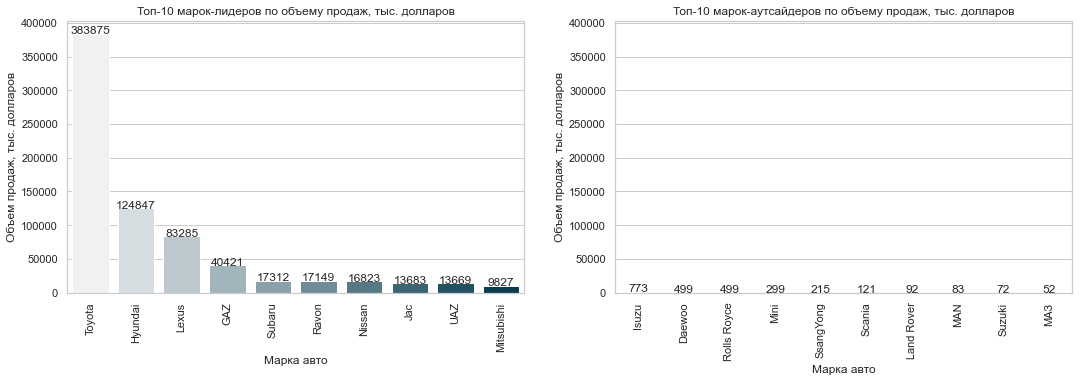

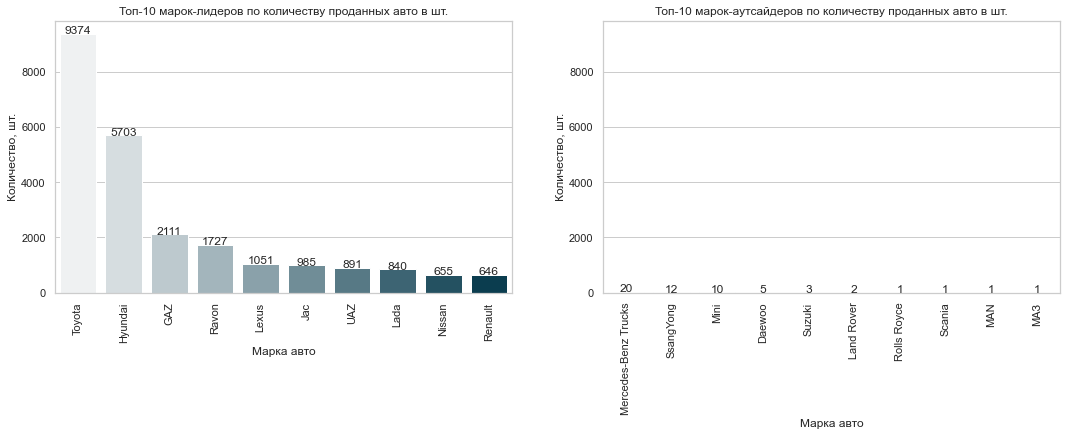

In [60]:
complex_info(df_one)

В розничных продажах, безусловный лидер `'Toyota'` по объему продаж и про количеству проданных авто - 9 3 74 ед. авто на 383 875 тыс.долл., второе место - `'Hyundai'`: 5 703 ед. авто на 124 847 тыс.долл. Аутсайдеры: `'МАЗ'` - 1 авто за 52 тыс.долл., `'Suzuki'` - 3 авто на 72 тыс.долл. 

#### Посмотрим на оптовые продажи

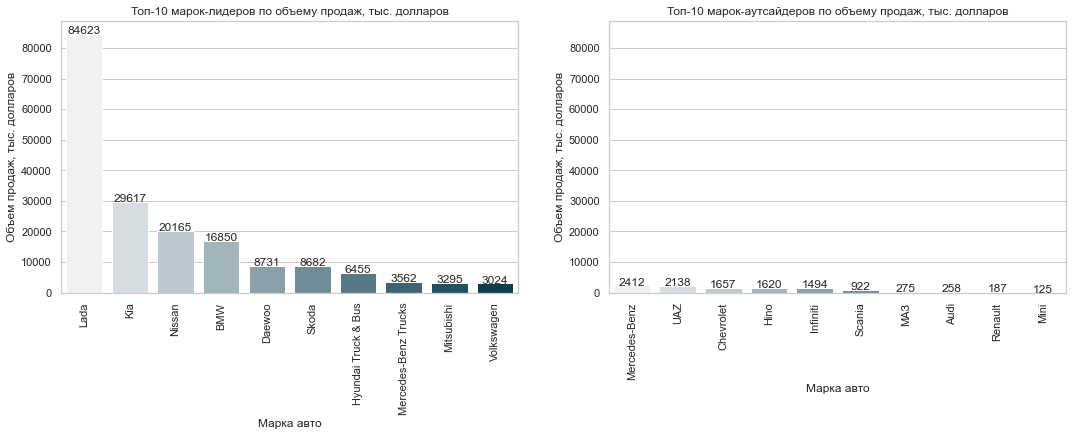

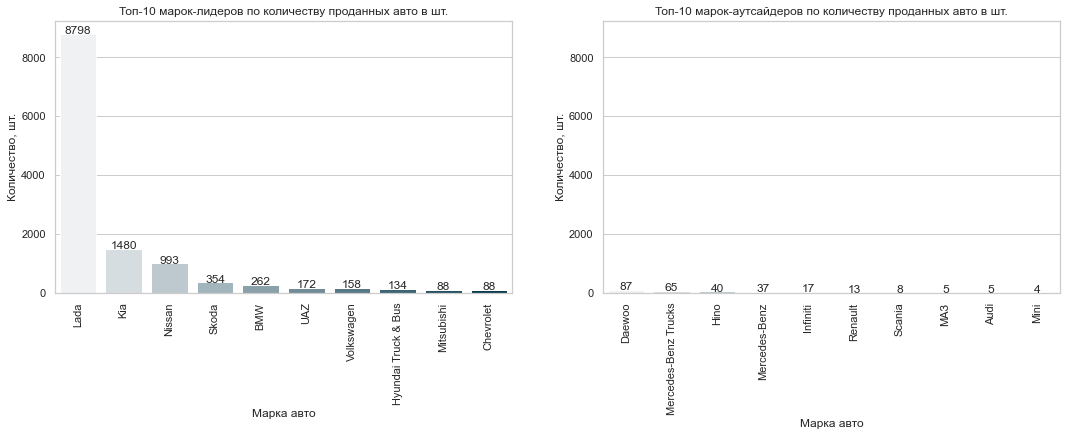

In [61]:
complex_info(df_many)

В оптовых продажах, безусловный лидер `'Lada'` по объему продаж и про количеству проданных авто - 8 798 ед. авто на 84 623 тыс.долл., второе место - `'Kia'`: 1 480 ед. авто на 29 617 тыс.долл. Интересный факт, что `'BMW'` на 4-м месте: 262 ед. авто на 16 850 тыс.долл.

Аутсайдеры: `'Mini'` - 4 авто за 125 тыс.долл., `'Audi'` - 5 авто на 258 тыс.долл.

### 2.2. Продажи на рынке Казахстана

In [62]:
'Количество проданных авто - {} шт. на сумму - {} тыс. долларов'.format(
    round(df['quantity'].sum()), round(df['sold_price_usd'].sum() / 1000)
)

'Количество проданных авто - 40737 шт. на сумму - 1025910 тыс. долларов'

### 2.3 Динамика продаж по месяцам

In [63]:
# построим сводную таблицу по продажам
month_revenue= ptb_cat(df, ['order_type', 'date'], 'sum')
month_revenue.head()

,order_type,date,total,revenue_K,share_%
0,розница,2019-06-30,3640,115317,11
1,розница,2019-05-31,3556,108838,10
2,розница,2019-08-31,3603,107778,10
3,розница,2019-09-30,3346,103322,10
4,розница,2019-07-31,3133,103279,10


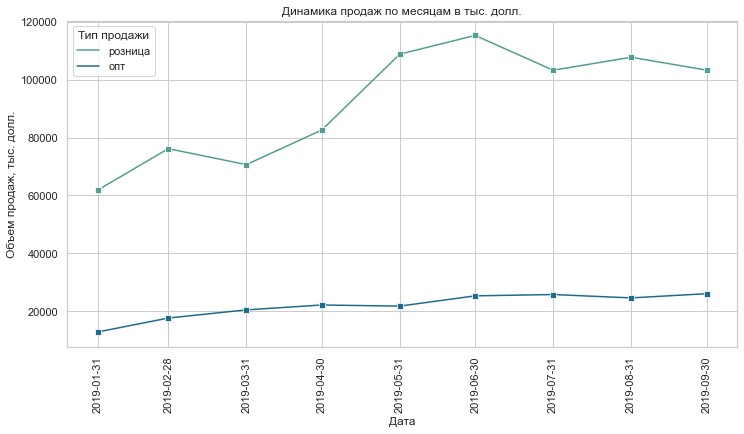

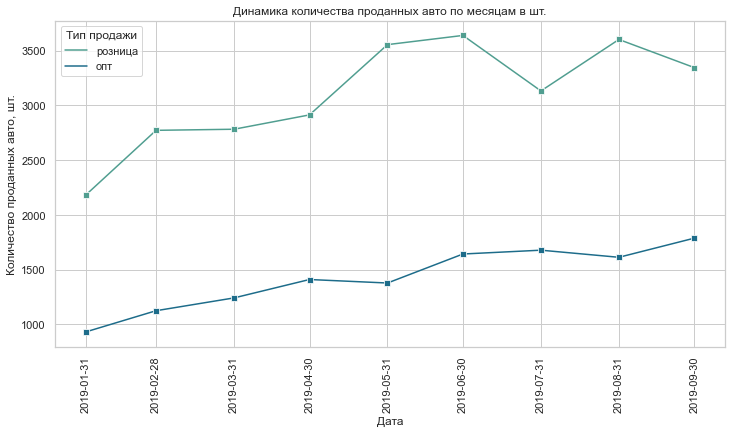

In [64]:
# динамика продаж по месяцам в тыс. долларов
plot_viz(
    month_revenue, 'date', 'revenue_K', 'order_type', 
    'Дата', 'Объем продаж, тыс. долл.', 'Динамика продаж по месяцам в тыс. долл.', 'Тип продажи'
)
plt.show()

# динамика количества проданных авто по месяцам в шт.
plot_viz(
    month_revenue, 'date', 'total', 'order_type',
    'Дата', 'Количество проданных авто, шт.', 'Динамика количества проданных авто по месяцам в шт.', 'Тип продажи'
)
plt.show()

Динамика продаж в оптовых продажах как в количественном, так и в денежном эквиваленте имеет восходящий тренд. Заметно небольшое падение в мае и августе.

Дминамика в розничных продажах так же имеет восходящий тренд, однако с большими изменениями. Пик июне, мае и августе, падение в июле и небольшое в сентябре.  

### 2.4. Динамика продаж по категория (тип топлива, класс, сегмент) 
#### Динамика продаж по типу топлива

In [65]:
df['fuel_type'].value_counts()

F      29535
D        590
G         70
HYB       18
Name: fuel_type, dtype: int64

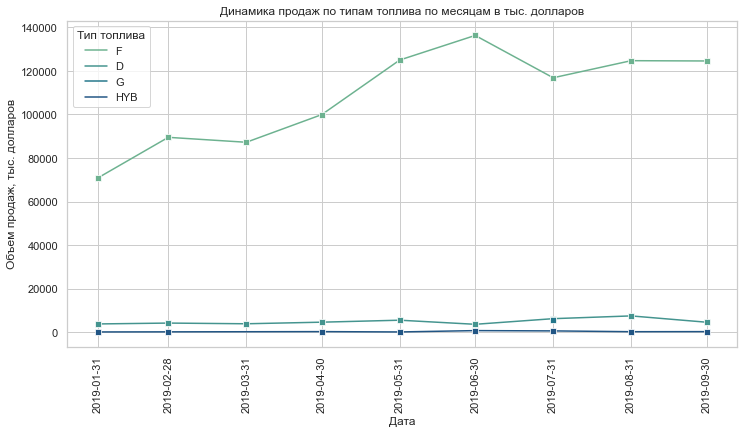

In [66]:
fuel_month_revenue = ptb_cat(df, ['date', 'fuel_type'], 'sum')
plot_viz(
    fuel_month_revenue, 'date', 'revenue_K', 'fuel_type', 
    'Дата', 'Объем продаж, тыс. долларов', 'Динамика продаж по типам топлива по месяцам в тыс. долларов', 'Тип топлива'
)
plt.show()

Проанализировать можно динамику по типу топлива F - бензин, по остальных недостаточно данных. Динамика продаж авто типа F повторяет кривую динамики розничных продаж авто, более гладкая.  

#### Динамика продаж по классу авто

In [67]:
df['segment_2013'].value_counts()

Внедорожники               13550
Легковые автомобили        12667
Коммерческие автомобили     3130
Пикапы                       810
Минивэны                      56
Name: segment_2013, dtype: int64

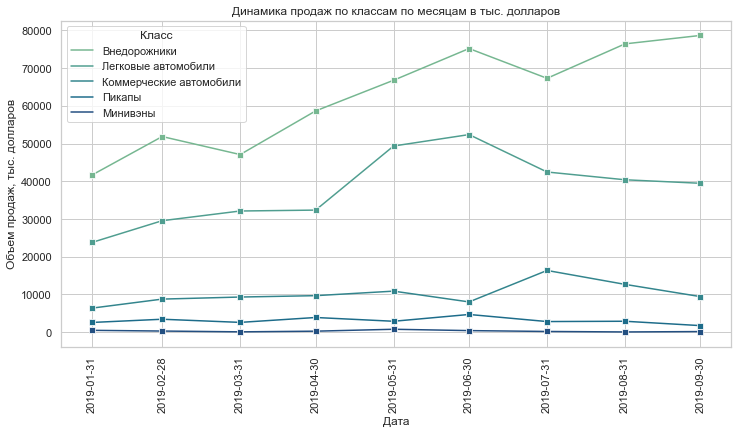

In [68]:
segment_month_revenue = ptb_cat(df, ['date', 'segment_2013'], 'sum')
plot_viz(
    segment_month_revenue, 'date', 'revenue_K', 'segment_2013', 
    'Дата', 'Объем продаж, тыс. долларов', 'Динамика продаж по классам по месяцам в тыс. долларов', 'Класс'
)
plt.show()

Восходящий тренд по всем классам, кроме Пикапов и Минивэнов. По данных категориям немного данных. Внедорожники наиболее популярный класс, рост с февраля - июнь, с небольшим падением в марте и июле, после снова рост продаж. Объем продаж Легковых автомобилей сильно вырос в мае-июне, после был отскок назад и падение вплоть до сентября.

#### Динамика продаж по сегменту

In [69]:
# выделим топ-10 сегментов
df['grade_2013'].value_counts().head(10)

B класс                    5682
С-SUV                      4545
E класс                    3688
C класс                    2985
D-SUV                      2884
Стандартные SUV            2239
В-SUV                      2176
Малотоннажные грузовики    1892
E-SUV                      1706
Pick-ups                    810
Name: grade_2013, dtype: int64

In [70]:
# возьмом наиболее многочисленных представителей
grades = df['grade_2013'].value_counts().head(9).reset_index()['index'].unique()

Сегмент E наиболе популярный, пик продаж в мае и июне, спад июль - сентябрь. За ним E-SUV класс, тренд восходящий, с падением в марте и небольшой корректировкой в июле-августе.

### 2.5. Продажи по регионам

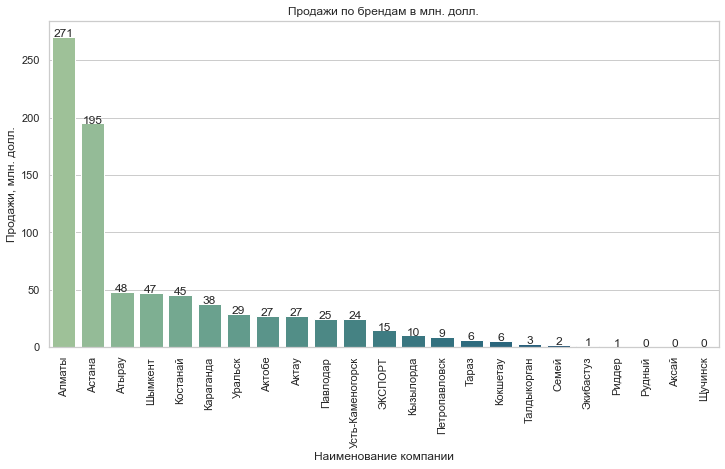

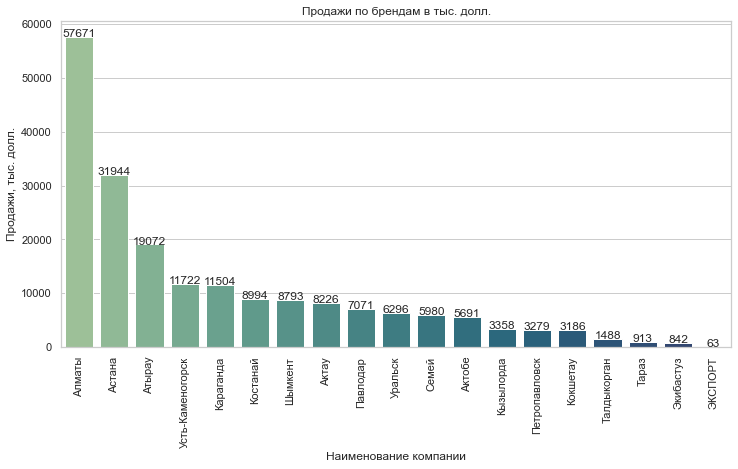

In [71]:
# посмотрим на объем продаж по городам
region_revenue_sum_one = ptb_cat(df_one, ['order_type','region'], 'sum')
region_revenue_sum_one['revenue_K'] = region_revenue_sum_one['revenue_K'] / 1000
region_revenue_sum_one = region_revenue_sum_one.rename(columns = {'revenue_K': 'revenue_M'})
region_revenue_sum_many = ptb_cat(df_many, ['order_type','region'], 'sum')

"""plot_viz(
    region_revenue_sum, 'region', 'revenue_K', 'order_type', 
    'Города', 'Объем продаж, тыс. долларов', 'Продажи по городам по типу продажи в тыс. долларов', 'Тип продажи'
)"""

bar_viz_one(24, region_revenue_sum_one, 'region', 'revenue_M', 
            'Наименование компании', 'Продажи, млн. долл.', 'Продажи по брендам в млн. долл.');
bar_viz_one(24, region_revenue_sum_many, 'region', 'revenue_K', 
            'Наименование компании', 'Продажи, тыс. долл.', 'Продажи по брендам в тыс. долл.');

Большая часть продаж проходит в Алматы и Астане - главные центры страны, как в розничных, так и в оптовых продажах. Так же интересны Атырау, Шымкент и Костанай.

### 2.6 Продажи по автоцентрам

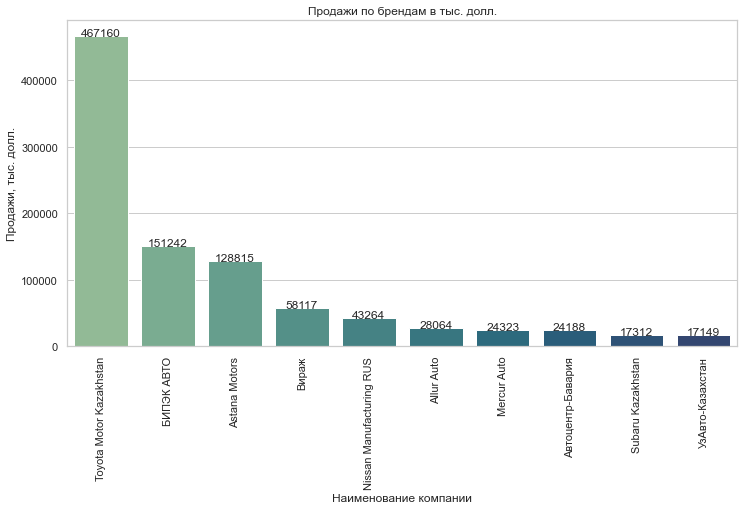

In [72]:
# сводная таблица
company_revenue = ptb_cat(df, 'company', 'sum')

bar_viz_one(10, company_revenue.head(10), 'company', 'revenue_K', 
            'Наименование компании', 'Продажи, тыс. долл.', 'Продажи по брендам в тыс. долл.');

Крупнешие дилеры: Toyota Motor Kazakhstan - 467 160 тыс.долл., БИПЭК АВТО - 151 242 тыс.долл., Astana Motors - 128 815 тыс.долл. Десятку замыкает УзАвто-Казахстан с объемом продаж в 17 149 тыс.долл. 	

### 2.7. Распределение марок по дилерам

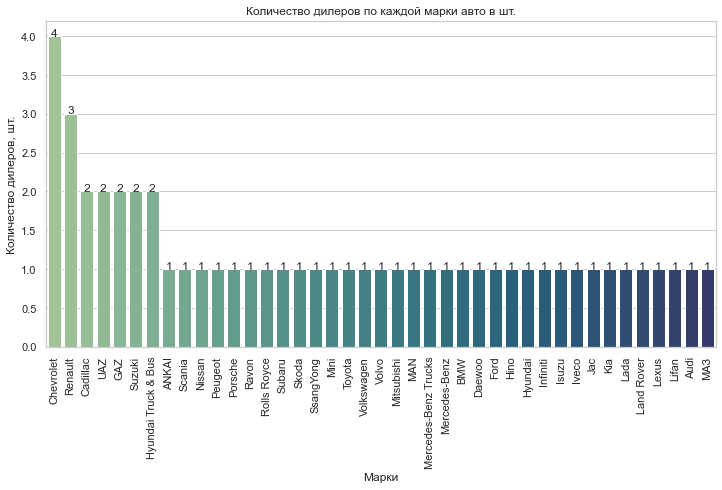

In [73]:
# посмотрим как часто разные марки встречаются у одних и тех же диллеров
brand_company = df.groupby('brand').agg({'company': 'nunique'}).sort_values(by = 'company', ascending = False).reset_index()

# построим линейный график
bar_viz_one(41, brand_company, 'brand', 'company', 
            'Марки', 'Количество дилеров, шт.', 'Количество дилеров по каждой марки авто в шт.')
plt.show()

Оказалось, что дилеры представляют уникальные марки, а значит являются единственными диллерами во всем Казахстане. Только небольшая часть компаний имеют схожие марки авто на реализацию.

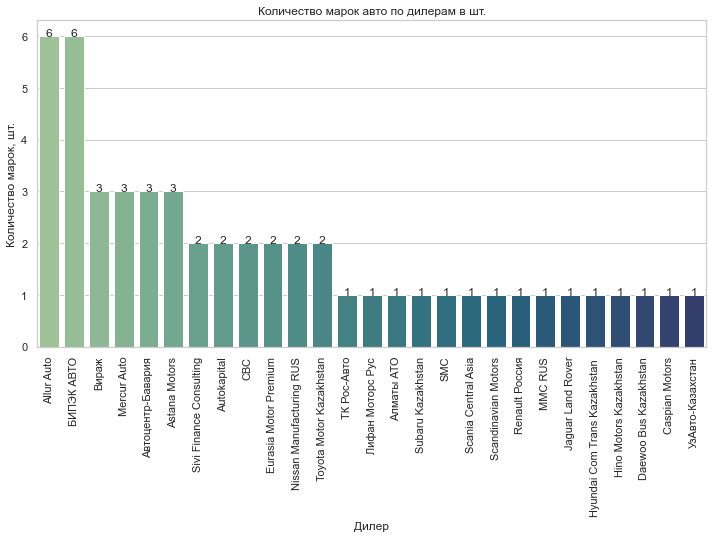

In [74]:
# посмотрим как часто разные марки встречаются у одних и тех же диллеров
company_brands = df.groupby('company').agg({'brand': 'nunique'}).sort_values(by = 'brand', ascending = False).reset_index()

# построим линейный график
bar_viz_one(41, company_brands, 'company', 'brand', 
            'Дилер', 'Количество марок, шт.', 'Количество марок авто по дилерам в шт.')
plt.show()

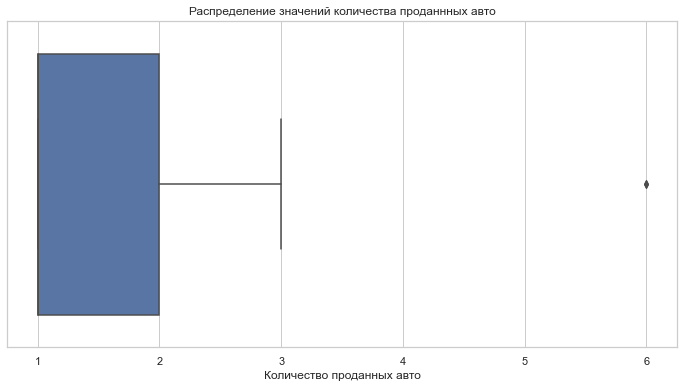

(count    27.000000
 mean      1.888889
 std       1.395965
 min       1.000000
 25%       1.000000
 50%       1.000000
 75%       2.000000
 max       6.000000
 Name: brand, dtype: float64,
 '95 перцентиль равен 5.099999999999998',
 'Медиана равна 1.0')

In [75]:
boxplot_viz(company_brands, 'brand', 'Количество проданных авто', 'Распределение значений количества проданнных авто')
plt.show()

common_info(company_brands, 'brand')

В среднем, дилер представляет только одну марку авто. Однако, наиболее крупные дилеры имеют 2 - 6 марок авто, которые по большей части представлены только у них. БИПЭК АВТО и Allur Auto - по 6 марок, Astana Motors - 3 марки, Toyota Motor Kazakhstan - 2 марки.

### Выводы по исследовательскому анализу

В розничных продажах лидер `'Toyota'` - 9 374 ед. авто на 383 875 тыс.долл., второе место - `'Hyundai'`: 5 703 ед. авто на 124 847 тыс.долл. Аутсайдеры: `'МАЗ'` - 1 авто за 52 тыс.долл., `'Suzuki'` - 3 авто на 72 тыс.долл. В оптовых продажах лидер `'Lada'` - 8 798 ед. авто на 84 623 тыс.долл., второе место - `'Kia'`: 1 480 ед. авто на 29 617 тыс.долл. Интересный факт, что `'BMW'` на 4-м месте: 262 ед. авто на 16 850 тыс.долл. Аутсайдеры: `'Mini'` - 4 авто за 125 тыс.долл., `'Audi'` - 5 авто на 258 тыс.долл.

Количество проданных авто за весь период - 40 737 шт. на сумму - 1 025 910 тыс. долл.

Динамика продаж в оптовых продажах как в количественном, так и в денежном эквиваленте имеет восходящий тренд. Заметно небольшое падение в мае и августе. В розничных продажах так же - восходящий тренд, однако с большими изменениями. Пик в июне, мае и августе, падение в июле и небольшое в сентябре. Динамика продаж авто типа F повторяет кривую динамики розничных продаж авто, более гладкая.  

Восходящий тренд по всем классам, кроме Пикапов и Минивэнов. По данным категориям немного данных. Внедорожники наиболее популярный класс, рост с февраля - июнь, с небольшим падением в марте и июле, после снова рост продаж. Объем продаж Легковых автомобилей сильно вырос в мае-июне, после был отскок назад и падение вплоть до сентября.

Сегмент E наиболе популярный, пик продаж в мае и июне, спад июль - сентябрь. За ним E-SUV класс, тренд восходящий, с падением в марте и небольшой корректировкой в июле-августе.

Большая часть продаж проходит в Алматы и Астане - главные центры страны, как в розничных, так и в оптовых продажах. Так же интересны Атырау, Шымкент и Костанай. Крупнешие дилеры: Toyota Motor Kazakhstan - 467 160 тыс.долл., БИПЭК АВТО - 151 242 тыс.долл., Astana Motors - 128 815 тыс.долл. Десятку замыкает УзАвто-Казахстан с объемом продаж в 17 149 тыс.долл. 	

Оказалось, что дилеры представляют уникальные марки, а значит являются единственными диллерами во всем Казахстане. Только небольшая часть компаний имеют схожие марки авто на реализацию.

В среднем, дилер представляет только одну марку авто. Однако, наиболее крупные дилеры имеют 2 - 6 марок авто, которые по большей части представлены только у них. БИПЭК АВТО и Allur Auto - по 6 марок, Astana Motors - 3 марки, Toyota Motor Kazakhstan - 2 марки.

## 3. Анализ компании Mercur Auto
Предварительно возьмем срез данных по компании Mercur Auto. Рассчитаем прибыль по отдельным маркам авто. Информация предоставлена заказчиком: `'Porsche'` и `'Audi'` - по 3%, `'Volkswagen'` - 5%. Добавим столбец `'income'` с информацией по прибыли. Напишем функцию для построения сводных таблиц по категории и методу подсчетов, функцию для визуализации.

In [76]:
# возьмем срез данных по компании mercur auto
mercur = df.loc[df['company'] == 'Mercur Auto']

In [77]:
# посотрим на количество даннных
mercur.shape

(597, 18)

In [78]:
def income_per(row):
    brand = row['brand']
    order_price = row['sold_price_usd']
    if brand in ['Porsche', 'Audi']:
        income = order_price * 0.03
    elif brand in ['Volkswagen']:
        income = order_price * 0.05
    return income

mercur['income'] = mercur.apply(income_per, axis=1)

In [79]:
# разделим оптовые и розничные продажи
mercur_one = mercur.loc[mercur['order_type'] == 'розница']
mercur_many = mercur.loc[mercur['order_type'] == 'опт']

In [80]:
# напишем функцию, которая считает количество/медиану по выбранной категории
def mercur_cat(df, сategory = [], what_count = [], method = []):
    new =(df
           .groupby(сategory)
           .agg({what_count: method, 'quantity': 'sum'})
           .rename(columns = {'quantity': 'sum_total'})
           .reset_index()
          )
    return new

In [81]:
def bar_viz_one(
    n, data1, dim1 = [], dim1_2 = [], x1_name = [], y1_name = [], title_name1 = []):
    # установим цветовую палитру
    plt.figure(figsize = (12, 6))
    sns.set_theme(style="whitegrid")
        
    f = sns.barplot(data = data1 , x = dim1, y = dim1_2, palette="crest") # построим гистограмму 
    f.set_title(title_name1)
    f.set_xlabel(x1_name)
    f.set_ylabel(y1_name)
    plt.xticks(rotation = 90)  # поворот записей по оси Х
    
     # добавим записиан для каждого столбца в диаграмме
    for p in f.patches:
     # высота столбца
     height = p.get_height()
     # добавим текс на каждый столбец
     f.text(x = p.get_x()+(p.get_width()/2), # положение записей на столбцах по оси X по центру
     y = height, # положение записей на столбцах по оси Y 
     s = '{:.0f}'.format(height), # формат записей на столбцах
     ha = 'center') # положение записей на столбцах

### 3.1. Основные показатели

#### Общая прибыль

In [82]:
'Общая прибыль компании за 9 месяцев - {} долларов'.format(round(mercur['income'].sum(), 1))

'Общая прибыль компании за 9 месяцев - 958718.7 долларов'

#### Прибыль по брендам

In [83]:
income_brands = (mercur_cat(mercur, 'brand', 'income', 'sum')
                      .sort_values(by = 'income', ascending= False)
                )
income_brands['share'] = round(income_brands['income'] / income_brands['income'].sum()* 100)
income_brands

,brand,income,sum_total,share
2,Volkswagen,572545.018895,558,60.0
1,Porsche,196421.530092,60,20.0
0,Audi,189752.175473,105,20.0


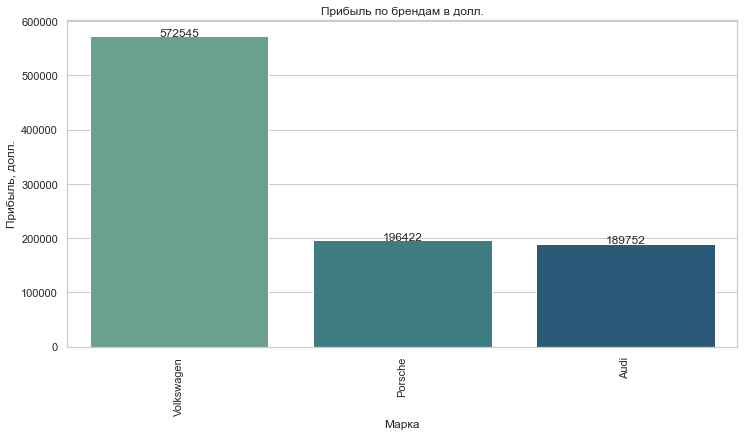

In [84]:
bar_viz_one(3, income_brands, 'brand', 'income', 'Марка', 'Прибыль, долл.', 'Прибыль по брендам в долл.')
plt.show()

Комания Mercur Auto получает максимальную прибыль от марки Volkswagen - 60 % (572 545), от Porsche и Audi - по 20%. Однако, количество проданных авто марки Audi - 105 ед., а Porsche - всего 60 ед.

#### Медианная продажа за период

In [85]:
'Медианная розничная продажа за период - {} долл., оптовая - {} долл.'.format(
    round(mercur_one['sold_price_usd'].median(), 1), 
    round(mercur_many['sold_price_usd'].median(), 1)
)

'Медианная розничная продажа за период - 20250.9 долл., оптовая - 72368.3 долл.'

#### Медианная продажа по маркам

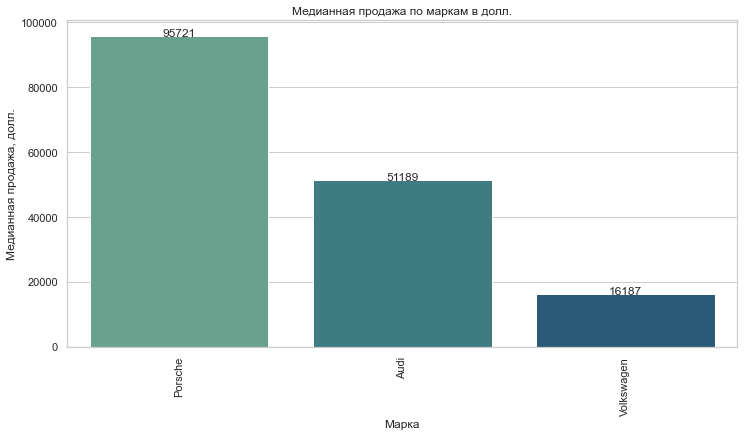

In [86]:
# посмотрим по розничныим продажам
mercur_median_sold = (mercur_cat(mercur_one, 'brand', 'sold_price_usd', 'median')
                      .sort_values(by = 'sold_price_usd', ascending= False))

# построим линейный график
bar_viz_one(3, mercur_median_sold, 'brand', 'sold_price_usd', 
            'Марка', 'Медианная продажа, долл.', 'Медианная продажа по маркам в долл.'
           )

Наибольшая медианная продажа Porsche - 95 721 доллар. По остальным: Audi - 51 189 доллара, Volkswagen - 16 187 доллара.

#### Динамика прибыли по маркам авто

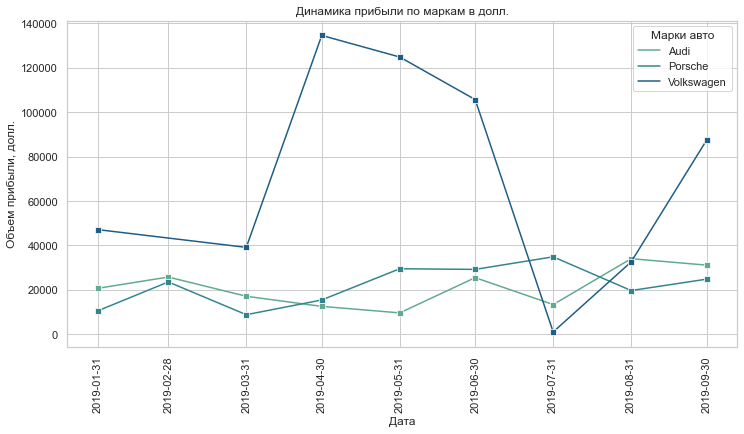

In [87]:
# сводная таблица
mercur_brands = mercur_cat(mercur, ['date', 'brand'], 'income', 'sum')

# построим линейный график
plot_viz(
    mercur_brands, 'date', 'income', 'brand', 
    'Дата', 'Объем прибыли, долл.', 'Динамика прибыли по маркам в долл.', 'Марки авто'
)

Динамика прибыли:
- `Volkswagen`: с янв - март объем прибыли упадал, в апреле был скачок вверх, прибыль выросла до 134 тыс. долларов. Май - июль снова падение, минимум был - 1 тыс. В августе - сентябре наблюдался рост. Наиболее прибыльные месяцы: апрель, май, июнь, сентябрь.
- `Porsche`: февраль - небольшой рост, марта - падение до минимума - около 8.8 тыс. долларов. Апрель - июь отмечены ростом прибыли, август - сентябрь, небольшая корректировка вниз. Наиболее прибыльные месяцы: май, июнь, июль.
- `Audi`: небольшой рост в феврале, после март - май падение до минимума 9.6 тыс. долларов. Дальше рост чередовался с падением, но тренд был все же восходящим. Наиболее прибыльные месяца: август и сентябрь. 

#### Динамика медианы продаж

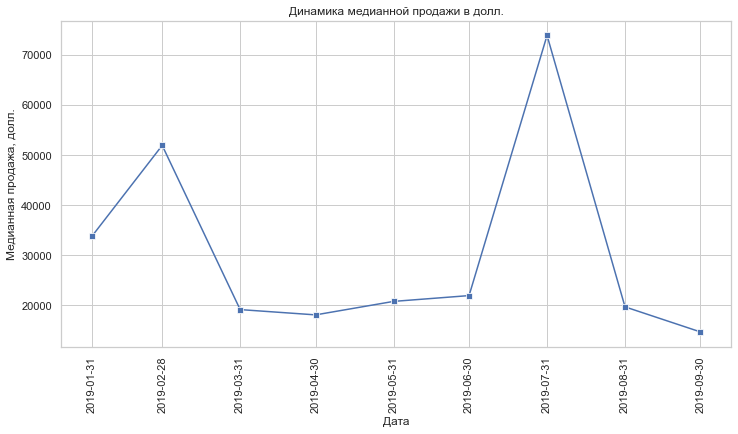

In [88]:
# сводная таблица
mercur_median_dyn = mercur_cat(mercur_one, 'date', 'sold_price_usd', 'median')

# линейный график
plot_one(
    mercur_median_dyn, 'date', 'sold_price_usd', 
    'Дата', 'Медианная продажа, долл.', 'Динамика медианной продажи в долл.'
)

Медиана продаж имеет два пика в феврале (52 тыс. долл.) и июле (74 тыс.долл.). Это связано с тем, что июль один из лучших месяцев по продажам Porsche и минимальные продажами Volkswagen. В феврале продажи Porsche и Audi так же были неплохими.

#### Динамика медианы продаж по маркам

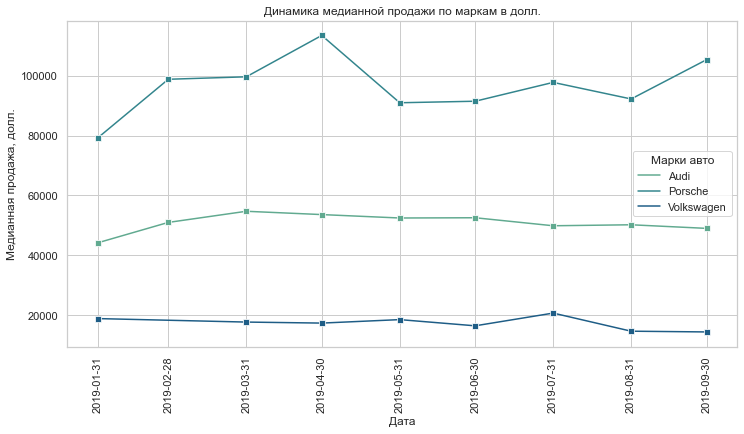

In [89]:
# сводная таблица на основании розничных продаж
mercur_dynamics = mercur_cat(mercur_one, ['date', 'brand'], 'sold_price_usd', 'median')

# построим линейный график
plot_viz(
    mercur_dynamics, 'date', 'sold_price_usd', 'brand', 
    'Дата', 'Медианная продажа, долл.', 'Динамика медианной продажи по маркам в долл.', 'Марки авто'
)

Динамика медианы продаж по маркам:
- `Audi`: февраль - март медианная стоимость выросла до 54.7 тыс. долл., в связи с активным спросов в эти месяцы. Далее апрель - июнь была корректировка 53 -54 тыс.долл., в период июль - сентябрь стоимость закрепилась в среднем 49 тыс. долл.  
- `Volkswagen`: с янв - май медиана продаж держалась 17.2 - 18.8 тыс. долл. Был скачок в июле до 20.6 тыс. долл., потому как было только одна продажа. Август - сентябрь около 14.4 тыс.дол.

В целом динамика медианы продаж у Audi и Volkswagen достаточно однородная. Что нельзя сказать про Porsche:
- `Porsche`: в апреле (11.3 тыс.долл.) и сентябре (10.5 тыс. долл.) замечены скачки вверх. В среднем продажа была от 9 - 10 тыс. долл.

### 3.2 Емкость авторынка Казахстана

#### Емкость рынка

In [90]:
('Фактическая емкость рынка в денежном эквиваленте - {} долл.'.format(round(df['sold_price_usd'].sum())), 
 'Фактическая емкость рынка в количественном эквиваленте - {} шт.'.format(round(df['quantity'].sum())), )

('Фактическая емкость рынка в денежном эквиваленте - 1025909946 долл.',
 'Фактическая емкость рынка в количественном эквиваленте - 40737 шт.')

In [91]:
('Прогнозная емкость рынка в денежном эквиваленте - {} долл.'.format(round(df['sold_price_usd'].sum() * 1.33)), 
 'Прогнозная емкость рынка в количественном эквиваленте - {} шт.'.format(round(df['quantity'].sum() * 1.33)))

('Прогнозная емкость рынка в денежном эквиваленте - 1364460229 долл.',
 'Прогнозная емкость рынка в количественном эквиваленте - 54180 шт.')

#### Емкость рынка по маркам

In [92]:
market_capacity = ptb_cat(df, 'brand', 'sum').drop(['share_%'], axis = 1)

# переведем объем продаж из тыс в млн
market_capacity['revenue_K'] = round(market_capacity['revenue_K'] / 1000, 1)
# переведем количество в сотни
market_capacity['total'] = round(market_capacity['total'] / 100, 1)
# переименуем колонки
market_capacity.columns = ['brand', 'total_H', 'revenue_M']
market_capacity.head()

,brand,total_H,revenue_M
0,Toyota,93.7,383.9
1,Hyundai,57.0,124.8
2,Lada,96.4,93.9
3,Lexus,10.5,83.3
4,GAZ,21.1,40.4


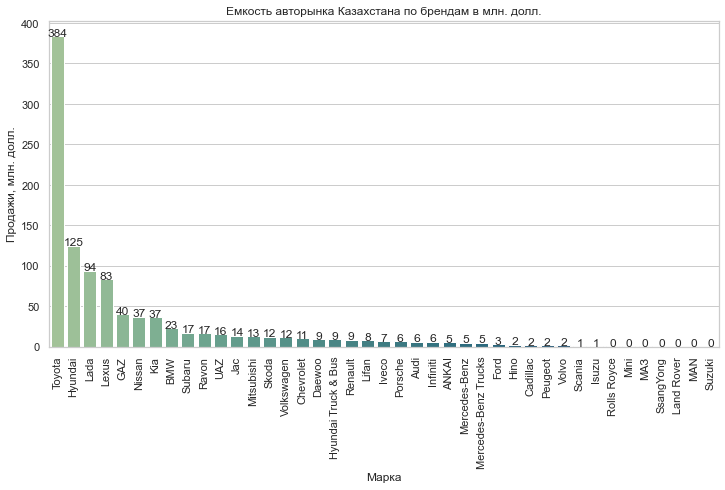

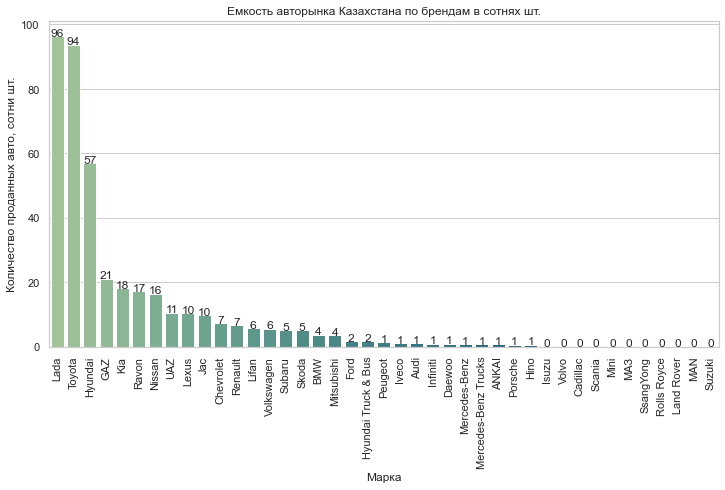

In [93]:
bar_viz_one(41, market_capacity, 'brand', 'revenue_M', 
            'Марка', 'Продажи, млн. долл.', 'Емкость авторынка Казахстана по брендам в млн. долл.'
           )
bar_viz_one(41, market_capacity.sort_values(by = 'total_H', ascending = False), 'brand', 'total_H', 
            'Марка', 'Количество проданных авто, сотни шт.', 'Емкость авторынка Казахстана по брендам в сотнях шт.'
           )

Емкость рынка по маркам:
- наиболее покупаемая марка авто `'Lada'` и `'Toyota'`, продано 9370 - 9640 шт.;
- по объему продаж - `'Toyota'`, потребители потратили на эту марку авто 384 млн.долл.

#### Емкость рынка по типам авто

In [94]:
market_capacity_segment = ptb_cat(df, 'segment_2013', 'sum').drop(['share_%'], axis = 1)
market_capacity_segment

,segment_2013,total,revenue_K
0,Внедорожники,17048,563607
1,Легковые автомобили,19335,341713
2,Коммерческие автомобили,3483,91138
3,Пикапы,814,27126
4,Минивэны,57,2325


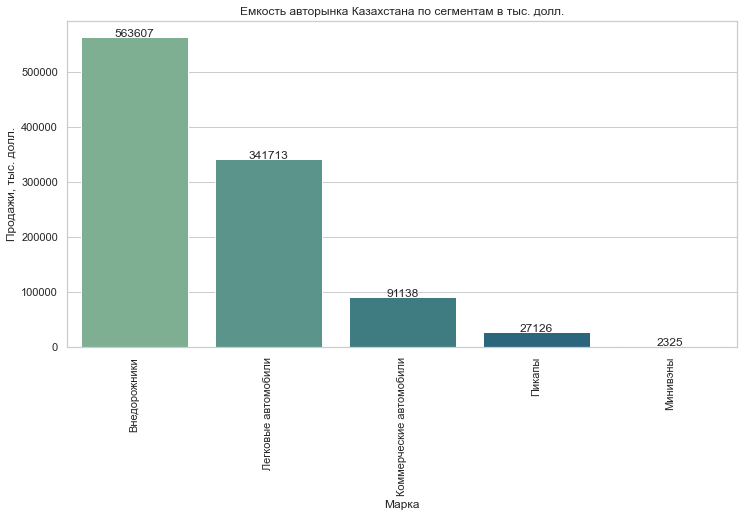

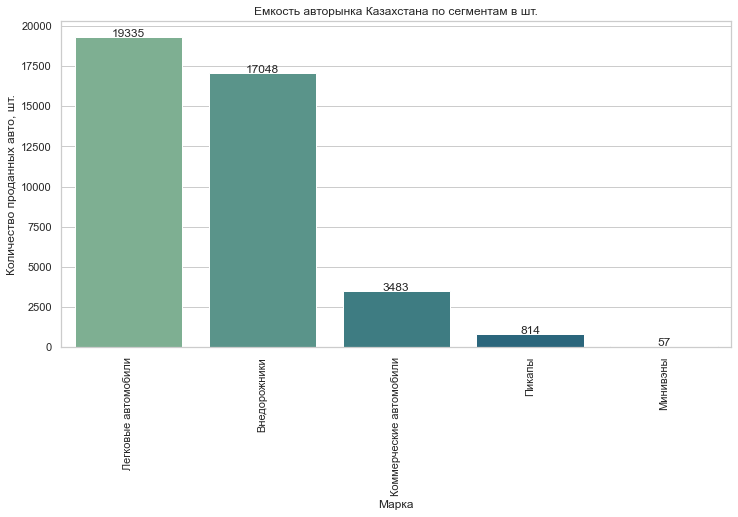

In [95]:
bar_viz_one(5, market_capacity_segment, 'segment_2013', 'revenue_K', 
            'Марка', 'Продажи, тыс. долл.', 'Емкость авторынка Казахстана по сегментам в тыс. долл.'
           )
plt.show()

bar_viz_one(5, market_capacity_segment.sort_values(by = 'total', ascending = False), 'segment_2013', 'total', 
            'Марка', 'Количество проданных авто, шт.', 'Емкость авторынка Казахстана по сегментам в шт.'
           )
plt.show()

Емкость рынка по сегментам:
- наиболее покупаемый сегмент авто `'Легковые автомобили'` (19 тыс. ед.) и `'Внедорожники'` (17 тыс. ед.);
- по объему продаж: на `'Внедорожники'` потребители потратили 564 тыс.долл., на `'Легковые автомобили'` - 342 тыс. долл.

### 3.3. Доля рынка

#### Общая доля рынка дилера: в количественном и стоимостном выражении

In [96]:
'Доля рынка Mercur Auto по количеству авто - {} %'.format(round(mercur['quantity'].sum() / df['quantity'].sum() * 100, 1))

'Доля рынка Mercur Auto по количеству авто - 1.8 %'

In [97]:
'Доля рынка Mercur Auto по объему продаж - {} %'.format(round(mercur['sold_price_usd'].sum() / df['sold_price_usd'].sum() * 100, 1))

'Доля рынка Mercur Auto по объему продаж - 2.4 %'

#### Доля рынка дилера по маркам

In [98]:
# возьмем сред по данным где есть марки 'Porsche', 'Audi', 'Volkswagen'
market = df.loc[df['brand'].isin(mercur['brand'].unique())]

In [99]:
brand_share = (mercur_cat(mercur, 'brand', 'sold_price_usd', 'sum')
                      .sort_values(by = 'sold_price_usd', ascending= False)
                      .rename(columns = {'sold_price_usd': 'mercur_sold'})
              )

market_share = (mercur_cat(market, 'brand', 'sold_price_usd', 'sum')
                      .sort_values(by = 'sold_price_usd', ascending= False)
                      .rename(columns = {'sold_price_usd': 'market_sold'})
               )

pivot_table_share = brand_share.merge(market_share, how = 'inner', on = 'brand')
pivot_table_share['mercur_share'] = round(pivot_table_share['mercur_sold'] / pivot_table_share['market_sold'] * 100, 1)
pivot_table_share

,brand,mercur_sold,sum_total_x,market_sold,sum_total_y,mercur_share
0,Volkswagen,1.145090e+07,558,1.145090e+07,558,100.0
1,Porsche,6.547384e+06,60,6.547384e+06,60,100.0
2,Audi,6.325073e+06,105,6.325073e+06,105,100.0


 Mercur Auto является единственных официальным дилером марок: Volkswagen, Porsche, Audi. Компании принадлежит 100 % рынка по данным маркам.

#### Доля рынка дилера по сегментам

In [100]:
# возьмем срез данных, где есть только те сегменты, с которыми работает mercur
market_grade = df.loc[df['grade_2013'].isin(mercur['grade_2013'].unique())]

In [101]:
grade_share = (mercur_cat(mercur, 'grade_2013', 'sold_price_usd', 'sum')
                      .sort_values(by = 'sold_price_usd', ascending= False)
                      .rename(columns = {'sold_price_usd': 'mercur_sold'})
              )

market_grade_share = (mercur_cat(market_grade, 'grade_2013', 'sold_price_usd', 'sum')
                      .sort_values(by = 'sold_price_usd', ascending= False)
                      .rename(columns = {'sold_price_usd': 'market_sold'})
               )

pivot_table_share = grade_share.merge(market_grade_share, on = 'grade_2013')
pivot_table_share['mercur_share'] = round(pivot_table_share['mercur_sold'] / pivot_table_share['market_sold'] * 100, 1)
pivot_table_share

,grade_2013,mercur_sold,sum_total_x,market_sold,sum_total_y,mercur_share
0,B класс,5.780447e+06,379,1.310721e+08,11629,4.4
1,Стандартные SUV,4.499718e+06,49,1.285397e+08,2515,3.5
2,С-SUV,3.596455e+06,89,1.377048e+08,5247,2.6
3,F класс,3.245792e+06,22,8.204692e+06,64,39.6
4,E класс,2.472570e+06,51,1.309989e+08,3798,1.9
5,C класс,1.717912e+06,81,6.478360e+07,3513,2.7
6,D-SUV,1.558835e+06,30,1.010813e+08,3055,1.5
7,Спортивные автомобили,5.352796e+05,4,6.369456e+05,5,84.0
8,Полноразмерный Минивэн,3.056464e+05,4,2.196781e+06,49,13.9
9,D класс,2.930406e+05,8,4.562359e+06,168,6.4


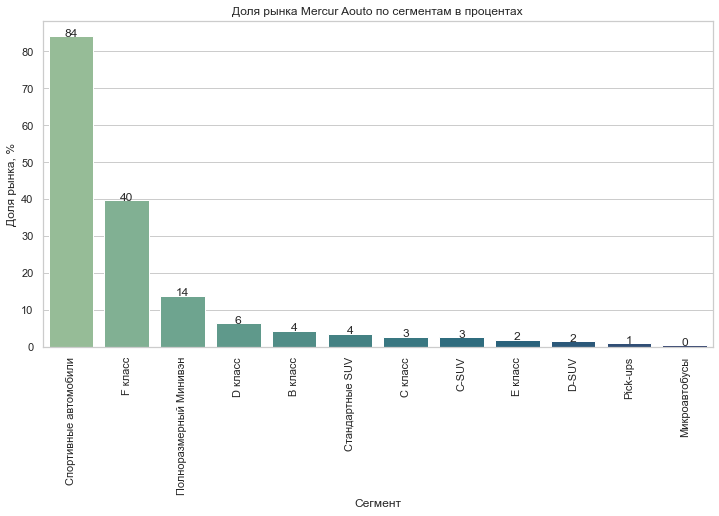

In [102]:
bar_viz_one(5, pivot_table_share.sort_values(by = 'mercur_share', ascending = False), 'grade_2013', 'mercur_share', 
            'Сегмент', 'Доля рынка, %', 'Доля рынка Mercur Aouto по сегментам в процентах'
           )

Mercur Auto принадлежит 84% доли рынка в сегменте "Спортивные автомобили." Следующим по величине - сегмент "F класс" - 40%.

### 3.4. Лидеры и конкуренты

#### Лидеры рынка

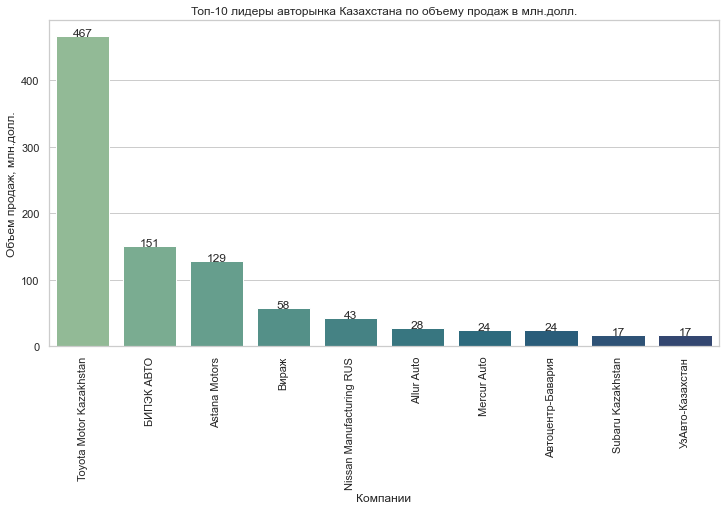

In [103]:
leaders = (mercur_cat(df, 'company', 'sold_price_usd', 'sum')
           .sort_values(by = ['sold_price_usd', 'sum_total'], ascending = False)
           .head(10)
          )

leaders['sold_price_usd'] = round(leaders['sold_price_usd'] / 1000000)
bar_viz_one(10, leaders, 'company', 'sold_price_usd', 
            'Компании', 'Объем продаж, млн.долл.', 'Топ-10 лидеры авторынка Казахстана по объему продаж в млн.долл.'
           )

Mercur auto входит топ-10 диллеров по объему продаж - 24 млн. долл. Лидерами рынка; на первом месте Toyota Motor Kazakhstan - 467 мнл.долл., на втором БИПЭК АВТО - 151 млн.долл., на третьем Astana Motors - 129 млн.долл.

#### Ближайшие конкуренты дилера 

In [104]:
# посмотрим города, в которых проданы авто диллера mercur auto
mercur['region'].unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Караганда', 'Уральск'],
      dtype=object)

In [105]:
# сколько диллеров выполняют продажи в этих городах
df.loc[df['region'].isin(mercur['region'].unique())]['company'].nunique()

27

In [106]:
# проверим конкурентов по сегментам 'Спортивные автомобили' и 'F класс'
df.loc[df['grade_2013'].isin(['Спортивные автомобили'])]['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария'], dtype=object)

In [107]:
df.loc[df['grade_2013'].isin(['F класс'])]['company'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'Astana Motors', 'БИПЭК АВТО',
       'Toyota Motor Kazakhstan', 'Autokapital'], dtype=object)

Mercur Auto реализует продукцию в следующих городах: Алматы,  Костанай, Атырау, Астана, Караганда, Уральск. В выделенных городах работают все диллеры, т.к. это наиболее крупные города. По маркам авто дилер не имеет конкурентов, т.к. компания является единственным официальным диллеров `'Porsche'`, `'Audi'`, `'Volkswagen'` на территории Казахстана. В сегменте "Спортивные автомобили" конкурентом выступает `'Автоцентр-Бавария'`, в сегменте `'F класс'` компании: `'Автоцентр-Бавария'`, `'Astana Motors'`, `'БИПЭК АВТО'`, `'Toyota Motor Kazakhstan'`, `'Autokapital'`.

Посмотрим на конкурентов в ценовом сегменте.

In [108]:
# посчитаем медиану mercur по брендам в розничных продажах
mercur_one.groupby('brand')['sold_price_usd'].median()

brand
Audi          51188.808475
Porsche       95720.572230
Volkswagen    16186.707798
Name: sold_price_usd, dtype: float64

In [109]:
# посчитаем медиану продаж по компаниям и брендам
all_company = mercur_cat(df_one, ['company', 'brand', 'segment_2013'], 'sold_price_usd', 'median')

# посмотрим на сегмент от 50 - 60 тыс. долл. - ревелевантен марке Audi
meddle_price = all_company.loc[(all_company['sold_price_usd'] >= 50000)].loc[all_company['sold_price_usd'] <= 60000 ]
meddle_price.loc[meddle_price['segment_2013'] != 'Коммерческие автомобили']

,company,brand,segment_2013,sold_price_usd,sum_total
28,Mercur Auto,Audi,Внедорожники,52578.000000,41
36,Mercur Auto,Volkswagen,Пикапы,57589.998201,5
45,Scandinavian Motors,Volvo,Легковые автомобили,57418.662918,6
53,Toyota Motor Kazakhstan,Toyota,Внедорожники,52648.809524,4078
58,Автоцентр-Бавария,BMW,Легковые автомобили,53809.983414,52


In [110]:
# посмотрим на сегмент от 90 - 110 тыс. долл. - ревелевантен марке Porsche
high_price = all_company.loc[(all_company['sold_price_usd'] >= 88000)].loc[all_company['sold_price_usd'] <= 105000 ]
high_price.loc[high_price['segment_2013'] != 'Коммерческие автомобили']

,company,brand,segment_2013,sold_price_usd,sum_total
22,Eurasia Motor Premium,Cadillac,Внедорожники,101563.000000,17
30,Mercur Auto,Porsche,Внедорожники,88079.528084,43


In [111]:
# посмотрим на сегмент от 15 - 20 тыс. долл. - ревелевантен марке Volkswagen
low_price = all_company.loc[(all_company['sold_price_usd'] >= 15000)].loc[all_company['sold_price_usd'] <= 20000 ]
low_price.loc[low_price['segment_2013'] != 'Коммерческие автомобили']

,company,brand,segment_2013,sold_price_usd,sum_total
4,Allur Auto,Peugeot,Внедорожники,19373.136902,3
7,Allur Auto,Peugeot,Минивэны,15827.023811,8
8,Allur Auto,SsangYong,Внедорожники,17636.580766,12
11,Astana Motors,Hyundai,Легковые автомобили,17967.467705,2507
34,Mercur Auto,Volkswagen,Легковые автомобили,15586.461563,320
66,БИПЭК АВТО,Kia,Легковые автомобили,17500.000000,141
73,БИПЭК АВТО,Skoda,Легковые автомобили,18700.000000,142
79,Вираж,UAZ,Внедорожники,16395.940633,239
81,Вираж,UAZ,Пикапы,17698.774723,39


- в ценовом сегменте от 88 - 105 тыс.долл. конкурент `'Porsche'` - это `'Cadillac'`, дилером данной марки является Eurasia Motor Premium;
- в ценовом сегменте 50 - 60 тыс. долл.: в сегменте "Внедорожники" конкурентом `'Audi'` выступает `'Toyota'` (дилер 	Toyota Motor Kazakhstan), в сегменте "Легковые автомобили" - `'Volvo'`(диллер Scandinavian Motors), `'BMW'`(дилер Автоцентр-Бавария), в сегменте "Пикапы" - родной `'Volkswagen'`;

- в ценовом сегменте от 15 - 20 тыс.долл.: в сегменте "Легковые автомобили" конкурентами `'Volkswagen'` выступают `'Hyundai'`(Astana Motors), `'Kia'` и `'Skoda'`(БИПЭК АВТО), в сегменте "Внедорожники"/"Минивэны" - `'SsangYong'` и `'Peugeot'`(Allur Auto).

### Выводы по анализу компании Mercur Auto

Компания Mercur Auto получает прибыль от продажи `'Porsche'` и `'Audi'` - по 3%, от `'Volkswagen'` - 5%. Добавлен столбец `'income'` с рассчитанной прибылью. 


Основные показатели компании Mercur Auto с янв. - сент. (вкл.) в 2019 г.:
- общая прибыль 958 718.7 долл.; 
- наиболее прибыльная марка Volkswagen - 572 545 долл. (60%), Porsche - 196 422 долл.(20%), Audi - 189 752 долл.(20%);
- медианная розничная продажа - 20250.9 долл., оптовая - 72368.3 долл.; 
- медианные продажи по маркам: Porsche - 95 721 долл., Audi - 51 189 долл., Volkswagen - 16 187 долл. 

Динамика прибыли по маркам:
- `Volkswagen`: с янв - март объем прибыли упадал, в апреле был скачок вверх, прибыль выросла до 134 тыс. долларов. Май - июль снова падение, минимум был - 1 тыс. В августе - сентябре наблюдался рост. Наиболее прибыльные месяцы: апрель, май, июнь, сентябрь.
- `Porsche`: февраль - небольшой рост, марта - падение до минимума - около 8.8 тыс. долларов. Апрель - июль отмечены ростом прибыли, август - сентябрь, небольшая корректировка вниз. Наиболее прибыльные месяцы: май, июнь, июль.
- `Audi`: небольшой рост в феврале, после март - май падение до минимума 9.6 тыс. долларов. Дальше рост чередовался с падением, но тренд был все же восходящим. Наиболее прибыльные месяца: август и сентябрь. 

Медиана продаж имеет два пика в феврале (52 тыс. долл.) и июле (74 тыс.долл.). Это связано с тем, что июль один из лучших месяцев по продажам Porsche и минимальные продажами Volkswagen. В феврале продажи Porsche и Audi так же были неплохими.

Динамика медианы продаж по маркам:
- `Audi`: февраль - март медианная стоимость выросла до 54.7 тыс. долл., в связи с активным спросов в эти месяцы. Далее апрель - июнь была корректировка 53 -54 тыс.долл., в период июль - сентябрь стоимость закрепилась в среднем 49 тыс. долл.  
- `Volkswagen`: с янв - май медиана продаж держалась 17.2 - 18.8 тыс. долл. Был скачок в июле до 20.6 тыс. долл., потому как было только одна продажа. Август - сентябрь около 14.4 тыс.дол.

В целом динамика медианы продаж у Audi и Volkswagen достаточно однородная. Что нельзя сказать про Porsche:
- `Porsche`: в апреле (11.3 тыс.долл.) и сентябре (10.5 тыс. долл.) замечены скачки вверх. В среднем продажа была от 9 - 10 тыс. долл.

Фактическая емкость рынка в денежном эквиваленте - 1 025 910 тыс долл., в количественном эквиваленте - 40 737 шт. Прогнозная емкость рынка в денежном эквиваленте - 1 364 460 тыс. долл.', в количественном эквиваленте - 54 180 шт.'

Емкость рынка по маркам:
- наиболее покупаемая марка авто `'Lada'` и `'Toyota'`, продано 9370 - 9640 шт.;
- по объему продаж - `'Toyota'`, потребители потратили на эту марку авто 384 млн.долл.

Емкость рынка по сегментам:
- наиболее покупаемый сегмент авто `'Легковые автомобили'` (19 тыс. ед.) и `'Внедорожники'` (17 тыс. ед.);
- по объему продаж: на `'Внедорожники'` потребители потратили 564 тыс.долл., на `'Легковые автомобили'` - 342 тыс. долл.

Доля рынка Mercur Auto по количеству авто - 1.8 %, по объему продаж - 2.4 %. Mercur Auto является единственных официальным дилером марок: Volkswagen, Porsche, Audi. Компании принадлежит 100 % рынка по данным маркам. Mercur Auto принадлежит 84% доли рынка в сегменте "Спортивные автомобили." Следующим по величине - сегмент "F класс" - 40%.

Mercur auto входит топ-10 диллеров по объему продаж - 24 млн. долл. Лидерами рынка; на первом месте Toyota Motor Kazakhstan - 467 мнл.долл., на втором БИПЭК АВТО - 151 млн.долл., на третьем Astana Motors - 129 млн.долл.

Mercur Auto реализует продукцию в следующих городах: Алматы,  Костанай, Атырау, Астана, Караганда, Уральск. В выделенных городах работают все диллеры, т.к. это наиболее крупные города. По маркам авто дилер не имеет конкурентов, т.к. компания является единственным официальным диллеров `'Porsche'`, `'Audi'`, `'Volkswagen'` на территории Казахстана. В сегменте "Спортивные автомобили" конкурентом выступает `'Автоцентр-Бавария'`, в сегменте `'F класс'` компании: `'Автоцентр-Бавария'`, `'Astana Motors'`, `'БИПЭК АВТО'`, `'Toyota Motor Kazakhstan'`, `'Autokapital'`.

- в ценовом сегменте от 88 - 105 тыс.долл. конкурент `'Porsche'` - это `'Cadillac'`, дилером данной марки является Eurasia Motor Premium;
- в ценовом сегменте 50 - 60 тыс. долл.: в сегменте "Внедорожники" конкурентом `'Audi'` выступает `'Toyota'` (дилер 	Toyota Motor Kazakhstan), в сегменте "Легковые автомобили" - `'Volvo'`(диллер Scandinavian Motors), `'BMW'`(дилер Автоцентр-Бавария), в сегменте "Пикапы" - родной `'Volkswagen'`;

- в ценовом сегменте от 15 - 20 тыс.долл.: в сегменте "Легковые автомобили" конкурентами `'Volkswagen'` выступают `'Hyundai'`(Astana Motors), `'Kia'` и `'Skoda'`(БИПЭК АВТО), в сегменте "Внедорожники"/"Минивэны" - `'SsangYong'` и `'Peugeot'`(Allur Auto).

Таким образом, основными конкурентами Mercur Auto являются дилеры: `'Автоцентр-Бавария'`, `'Astana Motors'`, `'БИПЭК АВТО'`, `'Toyota Motor Kazakhstan'`, `'Autokapital'`, `'Allur Auto'`, `'Eurasia Motor Premium'`, `'Scandinavian Motors'`.


## 4.Выводы и рекомендации

В процессе предобработки данных найдены явные дубликаты (13 357 строк). Возможно, что данные записи повторяющиеся продажи по дилерам, поэтому записи оставлены. Обработаны неявные дубликаты в названиях компаний, удалены пропуски, ненужные столбцы. Обработаны аномалии в данных объема двигателя и года производства авто. Данные приведены к соответствующим типам. Добавлен новый столбец с датой. Данные страна производства, тип топлива, тип КПП, трансмиссия перекодированы, созданы новые словари.  

Данные представлены за 2019 год, с янв - сент. (вкл.). Распределение количества данных по месяцам равномерное. В данных представлено 27 автоцентров, 41 марка, 219 моделей. Год производства авто охватывает период 2011 - 2018 г. Страны- производители: Германия, США, Республика Казахстан, Российская Федерация, Белоруссия, Турция, Япония, Корея, Вьетнам, UK, Таиланд, Узбекистан, Венгрия, Австрия, Нидерланды, Швеция. Типы топлива: бензин, дизель, электрическийм, газовый, гибрид. Типы КПП: механическая, автоматическая, роботизированная, 'unknown'(неизвестно какой тип). Типы привода: полный, передний, задний привод, неполный привод (неизвестно передний или задний), 'unknown' (неизвестно какой привод). Регионы - 22 города и один пункт экспорт. В данных представлено - 17 отдельных областей/регионов.

Медиана количества проданнных авто - 1 шт. Медиана стоимости авто - 22 142 долл., стоимости заказа на авто - 24 827 долл. Стоимость заказа более 90 000 долларов, считается высокой. Данные решено не удалять, так как в данных есть предположительно оптовые заказы. 

Фактическая емкость рынка в денежном эквиваленте - 1 025 910 тыс долл., в количественном эквиваленте - 40 737 шт. Прогнозная емкость рынка в денежном эквиваленте - 1 364 460 тыс. долл.', в количественном эквиваленте - 54 180 шт.'

Емкость рынка по маркам:
- наиболее покупаемая марка авто `'Lada'` и `'Toyota'`, продано 9370 - 9640 шт.;
- по объему продаж - `'Toyota'`, потребители потратили на эту марку авто 384 млн.долл.

Емкость рынка по сегментам:
- наиболее покупаемый сегмент авто `'Легковые автомобили'` (19 тыс. ед.) и `'Внедорожники'` (17 тыс. ед.);
- по объему продаж: на `'Внедорожники'` потребители потратили 564 тыс.долл., на `'Легковые автомобили'` - 342 тыс. долл.


В розничных продажах лидер `'Toyota'` - 9 374 ед. авто на 383 875 тыс.долл., второе место - `'Hyundai'`: 5 703 ед. авто на 124 847 тыс.долл. Аутсайдеры: `'МАЗ'` - 1 авто за 52 тыс.долл., `'Suzuki'` - 3 авто на 72 тыс.долл. В оптовых продажах лидер `'Lada'` - 8 798 ед. авто на 84 623 тыс.долл., второе место - `'Kia'`: 1 480 ед. авто на 29 617 тыс.долл. Интересный факт, что `'BMW'` на 4-м месте: 262 ед. авто на 16 850 тыс.долл. Аутсайдеры: `'Mini'` - 4 авто за 125 тыс.долл., `'Audi'` - 5 авто на 258 тыс.долл.

Количество проданных авто за весь период - 40 737 шт. на сумму - 1 025 910 тыс. долл.

Динамика продаж в оптовых продажах как в количественном, так и в денежном эквиваленте имеет восходящий тренд. Заметно небольшое падение в мае и августе. В розничных продажах так же - восходящий тренд, однако с большими изменениями. Пик в июне, мае и августе, падение в июле и небольшое в сентябре. Динамика продаж авто типа F повторяет кривую динамики розничных продаж авто, более гладкая.  

Восходящий тренд по всем классам, кроме Пикапов и Минивэнов. По данным категориям немного данных. Внедорожники наиболее популярный класс, рост с февраля - июнь, с небольшим падением в марте и июле, после снова рост продаж. Объем продаж Легковых автомобилей сильно вырос в мае-июне, после был отскок назад и падение вплоть до сентября.

Сегмент E наиболе популярный, пик продаж в мае и июне, спад июль - сентябрь. За ним E-SUV класс, тренд восходящий, с падением в марте и небольшой корректировкой в июле-августе.

Большая часть продаж проходит в Алматы и Астане - главные центры страны, как в розничных, так и в оптовых продажах. Так же интересны Атырау, Шымкент и Костанай. Крупнешие дилеры: Toyota Motor Kazakhstan - 467 160 тыс.долл., БИПЭК АВТО - 151 242 тыс.долл., Astana Motors - 128 815 тыс.долл. Десятку замыкает УзАвто-Казахстан с объемом продаж в 17 149 тыс.долл. 	

Оказалось, что дилеры представляют уникальные марки, а значит являются единственными диллерами во всем Казахстане. Только небольшая часть компаний имеют схожие марки авто на реализацию.

В среднем, дилер представляет только одну марку авто. Однако, наиболее крупные дилеры имеют 2 - 6 марок авто, которые по большей части представлены только у них. БИПЭК АВТО и Allur Auto - по 6 марок, Astana Motors - 3 марки, Toyota Motor Kazakhstan - 2 марки.


#### Анализ компании Mercur Auto

Компания Mercur Auto получает прибыль от продажи `'Porsche'` и `'Audi'` - по 3%, от `'Volkswagen'` - 5%.

Основные данные о компании Mercur Auto с янв. - сент. (вкл.) в 2019 г.:
- общая прибыль 958 718.7 долл.; 
- наиболее прибыльная марка Volkswagen - 572 545 долл. (60%), Porsche - 196 422 долл.(20%), Audi - 189 752 долл.(20%);
- медианная розничная продажа - 20250.9 долл., оптовая - 72368.3 долл.; 
- медианные продажи по маркам: Porsche - 95 721 долл., Audi - 51 189 долл., Volkswagen - 16 187 долл; 
- доля рынка по количеству авто 1.8 %, по объему продаж - 2.4 %;
- является единственных официальным дилером марок: Volkswagen, Porsche, Audi; 
- принадлежит 84% доли рынка в сегменте "Спортивные автомобили", 40% в сегменте "F класс";
- входит в топ-10 диллеров по объему продаж - 24 млн. долл.

Динамика прибыли по маркам:
- `Volkswagen`: с янв - март объем прибыли упадал, в апреле был скачок вверх, прибыль выросла до 134 тыс. долларов. Май - июль снова падение, минимум был - 1 тыс. В августе - сентябре наблюдался рост. Наиболее прибыльные месяцы: апрель, май, июнь, сентябрь.
- `Porsche`: февраль - небольшой рост, марта - падение до минимума - около 8.8 тыс. долларов. Апрель - июль отмечены ростом прибыли, август - сентябрь, небольшая корректировка вниз. Наиболее прибыльные месяцы: май, июнь, июль.
- `Audi`: небольшой рост в феврале, после март - май падение до минимума 9.6 тыс. долларов. Дальше рост чередовался с падением, но тренд был все же восходящим. Наиболее прибыльные месяца: август и сентябрь. 

Медиана продаж имеет два пика в феврале (52 тыс. долл.) и июле (74 тыс.долл.). Это связано с тем, что июль один из лучших месяцев по продажам Porsche и минимальные продажами Volkswagen. В феврале продажи Porsche и Audi так же были неплохими.

Динамика медианы продаж по маркам:
- `Audi`: февраль - март медианная стоимость выросла до 54.7 тыс. долл., в связи с активным спросов в эти месяцы. Далее апрель - июнь была корректировка 53 -54 тыс.долл., в период июль - сентябрь стоимость закрепилась в среднем 49 тыс. долл.  
- `Volkswagen`: с янв - май медиана продаж держалась 17.2 - 18.8 тыс. долл. Был скачок в июле до 20.6 тыс. долл., потому как было только одна продажа. Август - сентябрь около 14.4 тыс.дол.

В целом динамика медианы продаж у Audi и Volkswagen достаточно однородная. Что нельзя сказать про Porsche:
- `Porsche`: в апреле (11.3 тыс.долл.) и сентябре (10.5 тыс. долл.) замечены скачки вверх. В среднем продажа была от 9 - 10 тыс. долл.


Mercur Auto реализует продукцию в следующих городах: Алматы,  Костанай, Атырау, Астана, Караганда, Уральск. В выделенных городах работают все диллеры, т.к. это наиболее крупные города. По маркам авто дилер не имеет конкурентов, т.к. компания является единственным официальным диллеров `'Porsche'`, `'Audi'`, `'Volkswagen'` на территории Казахстана. 

- в ценовом сегменте от 88 - 105 тыс.долл. конкурент `'Porsche'` - это `'Cadillac'`, дилером данной марки является Eurasia Motor Premium;
- в ценовом сегменте 50 - 60 тыс. долл.: в сегменте "Внедорожники" конкурентом `'Audi'` выступает `'Toyota'` (дилер 	Toyota Motor Kazakhstan), в сегменте "Легковые автомобили" - `'Volvo'`(диллер Scandinavian Motors), `'BMW'`(дилер Автоцентр-Бавария), в сегменте "Пикапы" - родной `'Volkswagen'`;

- в ценовом сегменте от 15 - 20 тыс.долл.: в сегменте "Легковые автомобили" конкурентами `'Volkswagen'` выступают `'Hyundai'`(Astana Motors), `'Kia'` и `'Skoda'`(БИПЭК АВТО), в сегменте "Внедорожники"/"Минивэны" - `'SsangYong'` и `'Peugeot'`(Allur Auto).

Таким образом, основными конкурентами Mercur Auto являются дилеры: `'Автоцентр-Бавария'`, `'Astana Motors'`, `'БИПЭК АВТО'`, `'Toyota Motor Kazakhstan'`, `'Autokapital'`, `'Allur Auto'`, `'Eurasia Motor Premium'`, `'Scandinavian Motors'`.

#### Рекомендации
Динамика продаж показала, что у компания хорошие результаты по продажам Volkswagen в апреле, Porsche в июне - июле, Audi - в августе. Данные можно использовать при планировании закупок на следующий год. Дополнительно, можно провести рекламную кампанию, чтобы расширить аудиторию. Дополнительно поработать со стоимостью на авто и рекламными кампаниями в месяцы с наименьшей прибылью (март, июль), чтобы улучшить результаты. 